<a href="https://colab.research.google.com/github/Giriankur/project_4/blob/main/digichrome_academy_liver_cirrhosis_stage_classification_12052024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Problem Statement URL : https://www.kaggle.com/datasets/aadarshvelu/liver-cirrhosis-stage-classification

Preprocessing and Feature Engineering:

    - For all numerical type : get deciles distribution and check what is the percentage / ratio of data lying under each 10 percentile bucket.
    - For all numerical type : Filter at index which datapoint is reportyed greater than median.
    - For all numerical type : Filter at index what is the difference from the median of that column.
    - For all catgegorical type : use labelencoding.
    - For all catgegorical type : use onehotencoding --> **pd.get_dummies()**

**General Pointers:**

- concatinate all the data together as per index.
- keep an eye on the shape of the data.
- fit relevant model(s) and log there corresponding performence metric.
- Choose metric wisely. Check the class distribution of the target variable here --> Stage and based on that finalize the metric
- on the categorical side see if dropping onehotencoded features help in improving model accuracy .
- hyperparameter tuning with both GridSearch and RandomSearch and see if there is any significant amount of improvement in the metric or not.
- Make a dataframe based representatation that helps us to understand all the KPIs for tuned and untuned models.
- Load the inference dataframe.
- Perform the exact same preprocessing steps and check the shape of the data.
- predict on the inference dataframe.
- Load the inference actuals.
- Tally predictions made on inference dataframwe with inference actuals and record the general KPIs.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LIVER_CIRRHOISIS_DATA_PATH = r"/content/liver_cirrhosis.csv"
data = pd.read_csv(LIVER_CIRRHOISIS_DATA_PATH, encoding_errors = "ignore")
data_for_inference = data.loc[20000:]
data = data.loc[:19999]
print(f"Shape of the data is : {data.shape}")
data.head()

Shape of the data is : (20000, 19)


N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [3]:
data_for_inference.shape

(5000, 19)

In [4]:
data_for_inference

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
20000    3577      C          Placebo  16688   F       N            N       N   
20001    1212      D          Placebo  12963   F       N            N       N   
20002    1301     CL          Placebo  12738   F       N            Y       Y   
20003    2666      C          Placebo  15909   F       N            Y       Y   
20004    3388      C          Placebo  22836   F       N            N       N   
...       ...    ...              ...    ...  ..     ...          ...     ...   
24995    3584      D  D-penicillamine  23612   F       N            N       N   
24996    3584      D  D-penicillamine  23612   F       N            N       N   
24997     971      D  D-penicillamine  16736   F       N            Y       Y   
24998    3707      C  D-penicillamine  16990   F       N            Y       N   
24999    3707      C  D-penicillamine  16990   F       N            Y       N   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
20000     N        0.7   281.000000     3.85    40.0    1181.0   88.35   
20001     N        1.3   408.000000     4.22    67.0    1387.0  142.60   
20002     S        1.1   432.000000     3.57    45.0    1406.0  190.00   
20003     S        0.6   220.000000     3.35    57.0    1620.0  153.45   
20004     N        0.6   212.000000     4.03    10.0     648.0   71.30   
...     ...        ...          ...      ...     ...       ...     ...   
24995     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24996     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24997     Y        5.1   369.510563     3.23    18.0     790.0  179.80   
24998     N        0.8   315.000000     4.24    13.0    1637.0  170.50   
24999     N        0.8   315.000000     4.24    13.0    1637.0  170.50   

       Tryglicerides  Platelets  Prothrombin  Stage  
20000     130.000000      244.0         10.6      2  
20001     137.000000      295.0         10.1      2  
20002      77.000000      248.0         11.4      3  
20003      80.000000      311.0         11.2      3  
20004      77.000000      316.0         17.1      1  
...              ...        ...          ...    ...  
24995      96.000000      295.0         11.0      2  
24996      96.000000      295.0         11.0      2  
24997     124.702128      104.0         13.0      3  
24998      70.000000      426.0         10.9      2  
24999      70.000000      426.0         10.9      2  

[5000 rows x 19 columns]

In [5]:
#### Preparing data for inference.
data_for_inference_actuals = data_for_inference["Stage"]
data_for_inference.drop(["Stage"], axis =1, inplace = True )
data_for_inference.to_csv("./data_for_inference.csv", index = False)
data_for_inference_actuals.to_csv("./inference_actuals.csv", index = False)
data.to_csv("Training_and_Valiation_data.csv", index = False)
data_for_inference.shape

(5000, 18)

In [6]:
LIVER_CIRRHOISIS_DATA_PATH = r"/content/Training_and_Valiation_data.csv"
data = pd.read_csv(LIVER_CIRRHOISIS_DATA_PATH, encoding_errors = "ignore")
print(f"Shape of the data is : {data.shape}")
data.head()

Shape of the data is : (20000, 19)


N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         20000 non-null  int64  
 1   Status         20000 non-null  object 
 2   Drug           20000 non-null  object 
 3   Age            20000 non-null  int64  
 4   Sex            20000 non-null  object 
 5   Ascites        20000 non-null  object 
 6   Hepatomegaly   20000 non-null  object 
 7   Spiders        20000 non-null  object 
 8   Edema          20000 non-null  object 
 9   Bilirubin      20000 non-null  float64
 10  Cholesterol    20000 non-null  float64
 11  Albumin        20000 non-null  float64
 12  Copper         20000 non-null  float64
 13  Alk_Phos       20000 non-null  float64
 14  SGOT           20000 non-null  float64
 15  Tryglicerides  20000 non-null  float64
 16  Platelets      20000 non-null  float64
 17  Prothrombin    20000 non-null  float64
 18  Stage 

In [8]:
numerical_list = []
categorical_list = []

for col in data.columns:
  if data[col].dtype == "object":
    categorical_list.append(col)
  else:
    numerical_list.append(col)

In [9]:
numerical_list

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [10]:
data.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [11]:
# Deciling for N_days
N_Days_DECILE1_list = []
N_Days_DECILE2_list = []
N_Days_DECILE3_list = []
N_Days_DECILE4_list = []
N_Days_DECILE5_list = []
N_Days_DECILE6_list = []
N_Days_DECILE7_list = []
N_Days_DECILE8_list = []
N_Days_DECILE8_list = []
N_Days_DECILE10_list = []

ndays_range = data["N_Days"].max() - data["N_Days"].min()
uniform_difference = ndays_range/10
print(f"ndays_range: {ndays_range}")
print(f"uniform_difference : {uniform_difference}")

N_Days_DECILE1_threshold = data["N_Days"].min() + uniform_difference
N_Days_DECILE2_threshold = N_Days_DECILE1_threshold + uniform_difference
N_Days_DECILE3_threshold = N_Days_DECILE2_threshold + uniform_difference
N_Days_DECILE4_threshold = N_Days_DECILE3_threshold + uniform_difference
N_Days_DECILE5_threshold = N_Days_DECILE4_threshold + uniform_difference
N_Days_DECILE6_threshold = N_Days_DECILE5_threshold + uniform_difference
N_Days_DECILE7_threshold = N_Days_DECILE6_threshold + uniform_difference
N_Days_DECILE8_threshold = N_Days_DECILE7_threshold + uniform_difference
N_Days_DECILE9_threshold = N_Days_DECILE8_threshold + uniform_difference
N_Days_DECILE10_threshold = N_Days_DECILE9_threshold + uniform_difference

print(f"N_Days_DECILE1_threshold : {N_Days_DECILE1_threshold}")
print(f"N_Days_DECILE2_threshold : {N_Days_DECILE2_threshold}")
print(f"N_Days_DECILE3_threshold : {N_Days_DECILE3_threshold}")
print(f"N_Days_DECILE4_threshold : {N_Days_DECILE4_threshold}")
print(f"N_Days_DECILE5_threshold : {N_Days_DECILE5_threshold}")
print(f"N_Days_DECILE6_threshold : {N_Days_DECILE6_threshold}")
print(f"N_Days_DECILE7_threshold : {N_Days_DECILE7_threshold}")
print(f"N_Days_DECILE8_threshold : {N_Days_DECILE8_threshold}")
print(f"N_Days_DECILE9_threshold : {N_Days_DECILE9_threshold}")
print(f"N_Days_DECILE10_threshold : {N_Days_DECILE10_threshold}")

ndays_range: 4754
uniform_difference : 475.4
N_Days_DECILE1_threshold : 516.4
N_Days_DECILE2_threshold : 991.8
N_Days_DECILE3_threshold : 1467.1999999999998
N_Days_DECILE4_threshold : 1942.6
N_Days_DECILE5_threshold : 2418.0
N_Days_DECILE6_threshold : 2893.4
N_Days_DECILE7_threshold : 3368.8
N_Days_DECILE8_threshold : 3844.2000000000003
N_Days_DECILE9_threshold : 4319.6
N_Days_DECILE10_threshold : 4795.0


In [12]:
N_Days_difference_from_median = []
for n_days in data["N_Days"]:
    difference = data["N_Days"].median() - n_days
    N_Days_difference_from_median.append(difference)

N_Days_difference_from_median_dataframe =  pd.DataFrame({"N_Days_MEDIAN_Difference": N_Days_difference_from_median})
# N_Days_difference_from_median_dataframe
data = pd.concat([data,N_Days_difference_from_median_dataframe], axis = 1)

<Axes: >

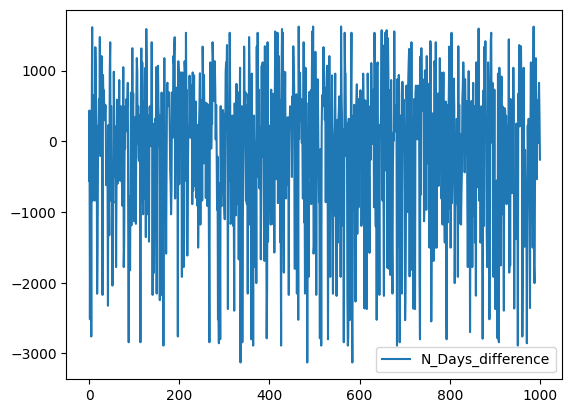

In [13]:
pd.DataFrame({"N_Days_difference": N_Days_difference_from_median}).loc[:1000].plot()

<Axes: >

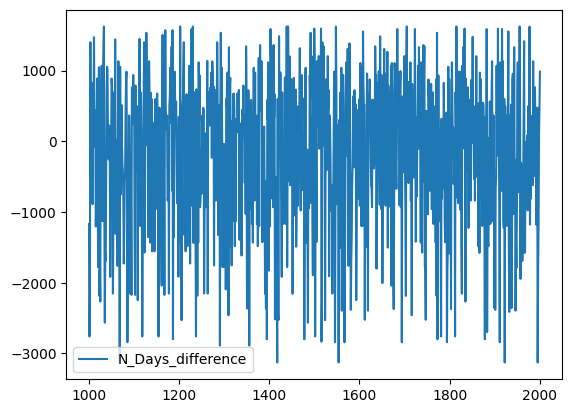

In [14]:
pd.DataFrame({"N_Days_difference": N_Days_difference_from_median}).loc[1001:2000].plot()

In [15]:
data["N_Days"].unique()

array([2221, 1230, 4184, 2090, 2105, 4427, 1418,   51, 2504, 1012, 1149,
       1037, 1234,  334,  733, 1581, 1443, 3823, 3170, 1735, 1558, 1067,
       1666,  191, 1874, 1690,  460, 2176, 3839,  727, 1092,  943, 1347,
       1368, 1170, 2286, 2050, 2224, 2022, 3992, 1434, 2338, 2995,  694,
        264, 2503, 1168, 2365, 3707, 2475, 2540,  681, 2171, 1455, 1769,
       3445, 1077, 2267, 2081, 1908,  799, 2111, 1419, 2255, 2576, 2202,
        617, 3099, 1568, 1525,  839, 3030, 4509, 2609, 2442, 3492, 2195,
        976, 2855, 1504,  348, 1301,  989, 2644, 2797, 1702, 1320, 2834,
       1103,  489, 1899, 1945, 1297,  994,  352, 2527,  549,  939, 2698,
       1342, 1831,  625, 3021,   77,  611, 2635, 3086, 1191, 1462, 1783,
       3527, 2721, 1725, 1343, 2103, 3820, 1785, 1656,  597, 1375, 1560,
       3913, 3850, 4556, 2583, 2556, 3255,  859,  837,  974, 2071, 2332,
       1119, 1615,  559,  326,  193, 1349,  904, 1293,  533,  708, 2272,
        691, 3584, 2990, 2976,  130, 3282, 2288, 16

In [16]:
data["N_Days"].nunique()

546

In [17]:
n_days_greater_than_less_than_median_list = []
for n_day in data["N_Days"]:
    if n_day > data["N_Days"].median():
        n_days_greater_than_less_than_median_list.append(1)
    else:
        n_days_greater_than_less_than_median_list.append(0)

In [18]:
N_Days_GREATER_THAN_MEDIAN_df = pd.DataFrame({"N_Days_GREATER_THAN_MEDIAN" : n_days_greater_than_less_than_median_list})

In [19]:
data = pd.concat([data, N_Days_GREATER_THAN_MEDIAN_df], axis = 1)

In [20]:
data[["N_Days", "N_Days_GREATER_THAN_MEDIAN"]]

N_Days  N_Days_GREATER_THAN_MEDIAN
0        2221                           1
1        1230                           0
2        4184                           1
3        2090                           1
4        2105                           1
...       ...                         ...
19995    4196                           1
19996    4256                           1
19997    2504                           1
19998    1030                           0
19999    1329                           0

[20000 rows x 2 columns]

In [21]:
data["N_Days_GREATER_THAN_MEDIAN"].value_counts()

N_Days_GREATER_THAN_MEDIAN
0    10049
1     9951
Name: count, dtype: int64

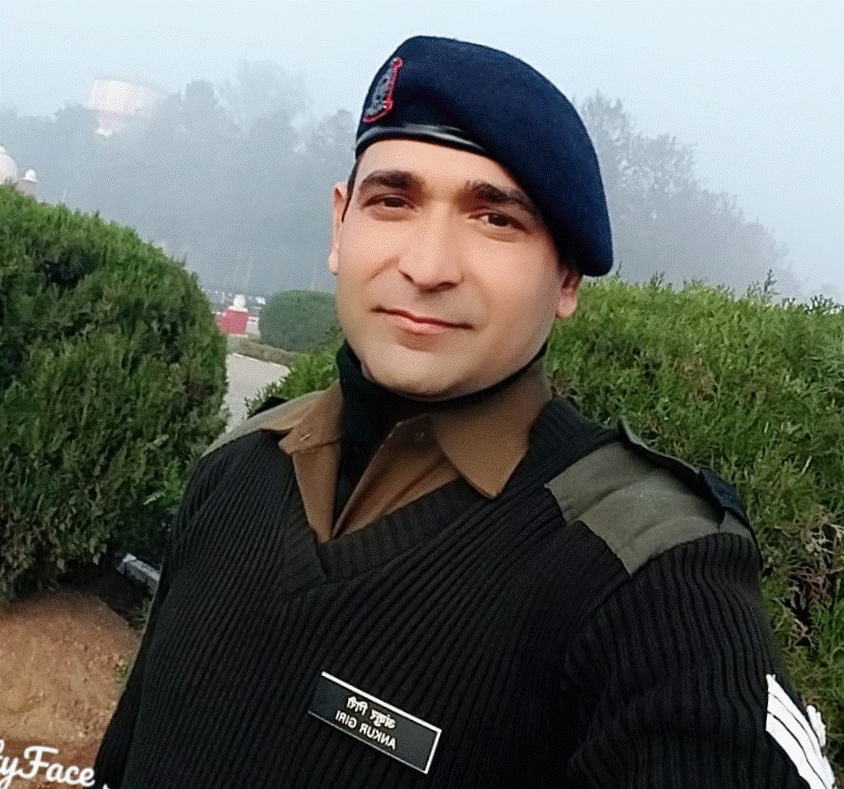



### ***THIS IS MY ASSIGNMENT NUMBER THREE***

---



In [22]:
!pip install xgboost

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
Liver_data = pd.read_csv("/content/liver_cirrhosis.csv")

In [26]:
Liver_data

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0        2221      C          Placebo  18499   F       N            Y       N   
1        1230      C          Placebo  19724   M       Y            N       Y   
2        4184      C          Placebo  11839   F       N            N       N   
3        2090      D          Placebo  16467   F       N            N       N   
4        2105      D          Placebo  21699   F       N            Y       N   
...       ...    ...              ...    ...  ..     ...          ...     ...   
24995    3584      D  D-penicillamine  23612   F       N            N       N   
24996    3584      D  D-penicillamine  23612   F       N            N       N   
24997     971      D  D-penicillamine  16736   F       N            Y       Y   
24998    3707      C  D-penicillamine  16990   F       N            Y       N   
24999    3707      C  D-penicillamine  16990   F       N            Y       N   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0         N        0.5   149.000000     4.04   227.0     598.0   52.70   
1         N        0.5   219.000000     3.93    22.0     663.0   45.00   
2         N        0.5   320.000000     3.54    51.0    1243.0  122.45   
3         N        0.7   255.000000     3.74    23.0    1024.0   77.50   
4         N        1.9   486.000000     3.54    74.0    1052.0  108.50   
...     ...        ...          ...      ...     ...       ...     ...   
24995     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24996     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24997     Y        5.1   369.510563     3.23    18.0     790.0  179.80   
24998     N        0.8   315.000000     4.24    13.0    1637.0  170.50   
24999     N        0.8   315.000000     4.24    13.0    1637.0  170.50   

       Tryglicerides  Platelets  Prothrombin  Stage  
0          57.000000      256.0          9.9      1  
1          75.000000      220.0         10.8      2  
2          80.000000      225.0         10.0      2  
3          58.000000      151.0         10.2      2  
4         109.000000      151.0         11.5      1  
...              ...        ...          ...    ...  
24995      96.000000      295.0         11.0      2  
24996      96.000000      295.0         11.0      2  
24997     124.702128      104.0         13.0      3  
24998      70.000000      426.0         10.9      2  
24999      70.000000      426.0         10.9      2  

[25000 rows x 19 columns]

In [27]:
Liver_data.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [28]:
Liver_data.head().T # Transpose the data to have a different look at the data

0        1        2        3        4
N_Days            2221     1230     4184     2090     2105
Status               C        C        C        D        D
Drug           Placebo  Placebo  Placebo  Placebo  Placebo
Age              18499    19724    11839    16467    21699
Sex                  F        M        F        F        F
Ascites              N        Y        N        N        N
Hepatomegaly         Y        N        N        N        Y
Spiders              N        Y        N        N        N
Edema                N        N        N        N        N
Bilirubin          0.5      0.5      0.5      0.7      1.9
Cholesterol      149.0    219.0    320.0    255.0    486.0
Albumin           4.04     3.93     3.54     3.74     3.54
Copper           227.0     22.0     51.0     23.0     74.0
Alk_Phos         598.0    663.0   1243.0   1024.0   1052.0
SGOT              52.7     45.0   122.45     77.5    108.5
Tryglicerides     57.0     75.0     80.0     58.0    109.0
Platelets        256.0    220.0    225.0    151.0    151.0
Prothrombin        9.9     10.8     10.0     10.2     11.5
Stage                1        2        2        2        1

In [29]:
Liver_data.tail()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
24995    3584      D  D-penicillamine  23612   F       N            N       N   
24996    3584      D  D-penicillamine  23612   F       N            N       N   
24997     971      D  D-penicillamine  16736   F       N            Y       Y   
24998    3707      C  D-penicillamine  16990   F       N            Y       N   
24999    3707      C  D-penicillamine  16990   F       N            Y       N   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
24995     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24996     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24997     Y        5.1   369.510563     3.23    18.0     790.0  179.80   
24998     N        0.8   315.000000     4.24    13.0    1637.0  170.50   
24999     N        0.8   315.000000     4.24    13.0    1637.0  170.50   

       Tryglicerides  Platelets  Prothrombin  Stage  
24995      96.000000      295.0         11.0      2  
24996      96.000000      295.0         11.0      2  
24997     124.702128      104.0         13.0      3  
24998      70.000000      426.0         10.9      2  
24999      70.000000      426.0         10.9      2

In [30]:
DATA =Liver_data.loc[20000:]
DATA

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
20000    3577      C          Placebo  16688   F       N            N       N   
20001    1212      D          Placebo  12963   F       N            N       N   
20002    1301     CL          Placebo  12738   F       N            Y       Y   
20003    2666      C          Placebo  15909   F       N            Y       Y   
20004    3388      C          Placebo  22836   F       N            N       N   
...       ...    ...              ...    ...  ..     ...          ...     ...   
24995    3584      D  D-penicillamine  23612   F       N            N       N   
24996    3584      D  D-penicillamine  23612   F       N            N       N   
24997     971      D  D-penicillamine  16736   F       N            Y       Y   
24998    3707      C  D-penicillamine  16990   F       N            Y       N   
24999    3707      C  D-penicillamine  16990   F       N            Y       N   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
20000     N        0.7   281.000000     3.85    40.0    1181.0   88.35   
20001     N        1.3   408.000000     4.22    67.0    1387.0  142.60   
20002     S        1.1   432.000000     3.57    45.0    1406.0  190.00   
20003     S        0.6   220.000000     3.35    57.0    1620.0  153.45   
20004     N        0.6   212.000000     4.03    10.0     648.0   71.30   
...     ...        ...          ...      ...     ...       ...     ...   
24995     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24996     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
24997     Y        5.1   369.510563     3.23    18.0     790.0  179.80   
24998     N        0.8   315.000000     4.24    13.0    1637.0  170.50   
24999     N        0.8   315.000000     4.24    13.0    1637.0  170.50   

       Tryglicerides  Platelets  Prothrombin  Stage  
20000     130.000000      244.0         10.6      2  
20001     137.000000      295.0         10.1      2  
20002      77.000000      248.0         11.4      3  
20003      80.000000      311.0         11.2      3  
20004      77.000000      316.0         17.1      1  
...              ...        ...          ...    ...  
24995      96.000000      295.0         11.0      2  
24996      96.000000      295.0         11.0      2  
24997     124.702128      104.0         13.0      3  
24998      70.000000      426.0         10.9      2  
24999      70.000000      426.0         10.9      2  

[5000 rows x 19 columns]

In [31]:
DATA_1 =Liver_data.loc[:19999]
DATA_1


N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0        2221      C  Placebo  18499   F       N            Y       N     N   
1        1230      C  Placebo  19724   M       Y            N       Y     N   
2        4184      C  Placebo  11839   F       N            N       N     N   
3        2090      D  Placebo  16467   F       N            N       N     N   
4        2105      D  Placebo  21699   F       N            Y       N     N   
...       ...    ...      ...    ...  ..     ...          ...     ...   ...   
19995    4196      C  Placebo  17841   F       N            Y       N     N   
19996    4256      C  Placebo  16034   M       N            N       N     N   
19997    2504      C  Placebo  16094   F       N            N       N     N   
19998    1030      C  Placebo  18302   M       N            N       N     N   
19999    1329      C  Placebo  14610   F       Y            N       Y     N   

       Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0            0.5        149.0     4.04   227.0     598.0   52.70   
1            0.5        219.0     3.93    22.0     663.0   45.00   
2            0.5        320.0     3.54    51.0    1243.0  122.45   
3            0.7        255.0     3.74    23.0    1024.0   77.50   
4            1.9        486.0     3.54    74.0    1052.0  108.50   
...          ...          ...      ...     ...       ...     ...   
19995        1.2        258.0     3.57    79.0    2201.0  120.90   
19996        0.6        216.0     3.94    28.0     601.0   60.45   
19997        0.5        120.0     3.61    53.0     804.0  110.05   
19998        1.1        412.0     3.99   103.0    1293.0   91.00   
19999        8.6        546.0     3.73    84.0    1070.0  127.00   

       Tryglicerides  Platelets  Prothrombin  Stage  
0               57.0      256.0          9.9      1  
1               75.0      220.0         10.8      2  
2               80.0      225.0         10.0      2  
3               58.0      151.0         10.2      2  
4              109.0      151.0         11.5      1  
...              ...        ...          ...    ...  
19995           76.0      410.0         11.5      3  
19996          188.0      211.0         13.0      1  
19997           52.0      271.0         10.6      2  
19998          113.0      182.0         10.8      3  
19999          153.0      145.0         10.4      2  

[20000 rows x 19 columns]

In [32]:
Liver_data.shape # check the shape of the data

(25000, 19)

In [33]:
Liver_data.shape[0]

25000

In [34]:
Liver_data.shape[1]

19

In [35]:
Liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [36]:
Liver_data.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [37]:
Liver_data["Bilirubin"] = Liver_data["Bilirubin"].astype("int64")# Data type Conversion
Liver_data["Cholesterol"] = Liver_data["Cholesterol"].astype("int64")# Data type Conversion
Liver_data["Albumin"] = Liver_data["Albumin"].astype("int64")# Data type Conversion
Liver_data["Copper"] = Liver_data["Copper"].astype("int64")# Data type Conversion
Liver_data["Alk_Phos"] = Liver_data["Alk_Phos"].astype("int64")# Data type Conversion
Liver_data["SGOT"] = Liver_data["SGOT"].astype("int64")# Data type Conversion
Liver_data["Tryglicerides"] = Liver_data["Tryglicerides"].astype("int64")# Data type Conversion
Liver_data["Platelets"] = Liver_data["Platelets"].astype("int64")# Data type Conversion
Liver_data["Prothrombin"] = Liver_data["Prothrombin"].astype("int64")# Data type Conversion

In [38]:
Liver_data.dtypes

N_Days            int64
Status           object
Drug             object
Age               int64
Sex              object
Ascites          object
Hepatomegaly     object
Spiders          object
Edema            object
Bilirubin         int64
Cholesterol       int64
Albumin           int64
Copper            int64
Alk_Phos          int64
SGOT              int64
Tryglicerides     int64
Platelets         int64
Prothrombin       int64
Stage             int64
dtype: object

In [39]:
Liver_data.columns # Check for the variables

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [40]:
numerical_list = []
categorical_list = []

for col in data.columns:
  if data[col].dtype == "object":
    categorical_list.append(col)
  else:
    numerical_list.append(col)

In [41]:
numerical_list

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'N_Days_MEDIAN_Difference',
 'N_Days_GREATER_THAN_MEDIAN']

In [42]:
categorical_list

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [43]:
Liver_data.isnull()

N_Days  Status   Drug    Age    Sex  Ascites  Hepatomegaly  Spiders  \
0       False   False  False  False  False    False         False    False   
1       False   False  False  False  False    False         False    False   
2       False   False  False  False  False    False         False    False   
3       False   False  False  False  False    False         False    False   
4       False   False  False  False  False    False         False    False   
...       ...     ...    ...    ...    ...      ...           ...      ...   
24995   False   False  False  False  False    False         False    False   
24996   False   False  False  False  False    False         False    False   
24997   False   False  False  False  False    False         False    False   
24998   False   False  False  False  False    False         False    False   
24999   False   False  False  False  False    False         False    False   

       Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  \
0      False      False        False    False   False     False  False   
1      False      False        False    False   False     False  False   
2      False      False        False    False   False     False  False   
3      False      False        False    False   False     False  False   
4      False      False        False    False   False     False  False   
...      ...        ...          ...      ...     ...       ...    ...   
24995  False      False        False    False   False     False  False   
24996  False      False        False    False   False     False  False   
24997  False      False        False    False   False     False  False   
24998  False      False        False    False   False     False  False   
24999  False      False        False    False   False     False  False   

       Tryglicerides  Platelets  Prothrombin  Stage  
0              False      False        False  False  
1              False      False        False  False  
2              False      False        False  False  
3              False      False        False  False  
4              False      False        False  False  
...              ...        ...          ...    ...  
24995          False      False        False  False  
24996          False      False        False  False  
24997          False      False        False  False  
24998          False      False        False  False  
24999          False      False        False  False  

[25000 rows x 19 columns]

In [44]:
Liver_data.isnull().sum()# Check for the null values in the dataset.

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [45]:
Liver_data.dropna()# Cleaned data where rows containing any missing values have been remove

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0        2221      C          Placebo  18499   F       N            Y       N   
1        1230      C          Placebo  19724   M       Y            N       Y   
2        4184      C          Placebo  11839   F       N            N       N   
3        2090      D          Placebo  16467   F       N            N       N   
4        2105      D          Placebo  21699   F       N            Y       N   
...       ...    ...              ...    ...  ..     ...          ...     ...   
24995    3584      D  D-penicillamine  23612   F       N            N       N   
24996    3584      D  D-penicillamine  23612   F       N            N       N   
24997     971      D  D-penicillamine  16736   F       N            Y       Y   
24998    3707      C  D-penicillamine  16990   F       N            Y       N   
24999    3707      C  D-penicillamine  16990   F       N            Y       N   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0         N          0          149        4     227       598    52   
1         N          0          219        3      22       663    45   
2         N          0          320        3      51      1243   122   
3         N          0          255        3      23      1024    77   
4         N          1          486        3      74      1052   108   
...     ...        ...          ...      ...     ...       ...   ...   
24995     N          0          231        3     173      9009   127   
24996     N          0          231        3     173      9009   127   
24997     Y          5          369        3      18       790   179   
24998     N          0          315        4      13      1637   170   
24999     N          0          315        4      13      1637   170   

       Tryglicerides  Platelets  Prothrombin  Stage  
0                 57        256            9      1  
1                 75        220           10      2  
2                 80        225           10      2  
3                 58        151           10      2  
4                109        151           11      1  
...              ...        ...          ...    ...  
24995             96        295           11      2  
24996             96        295           11      2  
24997            124        104           13      3  
24998             70        426           10      2  
24999             70        426           10      2  

[25000 rows x 19 columns]

In [46]:
duplicates = Liver_data.duplicated()

In [47]:
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
24995     True
24996     True
24997     True
24998     True
24999     True
Length: 25000, dtype: bool

In [48]:
Liver_data.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [49]:
Liver_data.drop_duplicates() #Drop duplicates based on specific columns

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0        2221      C          Placebo  18499   F       N            Y       N   
1        1230      C          Placebo  19724   M       Y            N       Y   
2        4184      C          Placebo  11839   F       N            N       N   
3        2090      D          Placebo  16467   F       N            N       N   
4        2105      D          Placebo  21699   F       N            Y       N   
...       ...    ...              ...    ...  ..     ...          ...     ...   
24963    3577      C          Placebo  17897   F       Y            N       Y   
24971    4795      C          Placebo  23376   F       Y            N       Y   
24972    3358      D  D-penicillamine  24585   F       N            Y       N   
24991    4365      C  D-penicillamine  21324   F       N            N       N   
24992     694      D  D-penicillamine  28650   M       Y            Y       Y   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0         N          0          149        4     227       598    52   
1         N          0          219        3      22       663    45   
2         N          0          320        3      51      1243   122   
3         N          0          255        3      23      1024    77   
4         N          1          486        3      74      1052   108   
...     ...        ...          ...      ...     ...       ...   ...   
24963     N          0          369        3      97      1982   122   
24971     N          1          369        3      97      1982   122   
24972     N          2          262        3      58      2045    89   
24991     N          0          346        3      81      1098   122   
24992     N          0          300        2     231      1794   130   

       Tryglicerides  Platelets  Prothrombin  Stage  
0                 57        256            9      1  
1                 75        220           10      2  
2                 80        225           10      2  
3                 58        151           10      2  
4                109        151           11      1  
...              ...        ...          ...    ...  
24963            124        243            9      1  
24971            124        139           10      1  
24972             84        412           11      3  
24991             90        228           10      2  
24992             99         97           11      3  

[9350 rows x 19 columns]

In [50]:
# identfy file the numeric and the categorical_columns as
numerical_columns= Liver_data.select_dtypes(include=["number"]).columns.to_list()
categorical_columns= Liver_data.select_dtypes(include=["object"]).columns.to_list()

In [51]:
numerical_columns

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [52]:
categorical_columns

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [53]:
Liver_data.describe()

N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean    1887.117040  18495.877080      2.950240    372.161760      2.962520   
std     1091.690918   3737.596616      4.779435    193.671073      0.406647   
min       41.000000   9598.000000      0.000000    120.000000      1.000000   
25%     1080.000000  15694.000000      0.000000    275.000000      3.000000   
50%     1680.000000  18499.000000      1.000000    369.000000      3.000000   
75%     2576.000000  20955.000000      3.000000    369.000000      3.000000   
max     4795.000000  28650.000000     28.000000   1775.000000      4.000000   

             Copper      Alk_Phos         SGOT  Tryglicerides     Platelets  \
count  25000.000000  25000.000000  25000.00000   25000.000000  25000.000000   
mean     100.010480   1995.477440    122.75044     123.584920    256.006520   
std       73.191441   1798.807236     47.73816      52.783436     98.678997   
min        4.000000    289.000000     26.00000      33.000000     62.000000   
25%       52.000000   1032.000000     92.00000      92.000000    189.000000   
50%       97.000000   1828.000000    122.00000     124.000000    251.000000   
75%      107.000000   1982.000000    134.00000     127.000000    311.000000   
max      588.000000  13862.000000    457.00000     598.000000    721.000000   

        Prothrombin        Stage  
count  25000.000000  25000.00000  
mean      10.307160      2.00116  
std        0.994772      0.81387  
min        9.000000      1.00000  
25%       10.000000      1.00000  
50%       10.000000      2.00000  
75%       11.000000      3.00000  
max       18.000000      3.00000

In [54]:
Liver_data.describe().T

count         mean          std     min      25%      50%  \
N_Days         25000.0   1887.11704  1091.690918    41.0   1080.0   1680.0   
Age            25000.0  18495.87708  3737.596616  9598.0  15694.0  18499.0   
Bilirubin      25000.0      2.95024     4.779435     0.0      0.0      1.0   
Cholesterol    25000.0    372.16176   193.671073   120.0    275.0    369.0   
Albumin        25000.0      2.96252     0.406647     1.0      3.0      3.0   
Copper         25000.0    100.01048    73.191441     4.0     52.0     97.0   
Alk_Phos       25000.0   1995.47744  1798.807236   289.0   1032.0   1828.0   
SGOT           25000.0    122.75044    47.738160    26.0     92.0    122.0   
Tryglicerides  25000.0    123.58492    52.783436    33.0     92.0    124.0   
Platelets      25000.0    256.00652    98.678997    62.0    189.0    251.0   
Prothrombin    25000.0     10.30716     0.994772     9.0     10.0     10.0   
Stage          25000.0      2.00116     0.813870     1.0      1.0      2.0   

                   75%      max  
N_Days          2576.0   4795.0  
Age            20955.0  28650.0  
Bilirubin          3.0     28.0  
Cholesterol      369.0   1775.0  
Albumin            3.0      4.0  
Copper           107.0    588.0  
Alk_Phos        1982.0  13862.0  
SGOT             134.0    457.0  
Tryglicerides    127.0    598.0  
Platelets        311.0    721.0  
Prothrombin       11.0     18.0  
Stage              3.0      3.0

In [55]:
# Encoding using One-hot encoder
Liver_data = pd.get_dummies(Liver_data,columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

In [56]:
Liver_data.head()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0    2221  18499          0          149        4     227       598    52   
1    1230  19724          0          219        3      22       663    45   
2    4184  11839          0          320        3      51      1243   122   
3    2090  16467          0          255        3      23      1024    77   
4    2105  21699          1          486        3      74      1052   108   

   Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  Hepatomegaly_N  \
0             57        256  ...  False       True      False           False   
1             75        220  ...   True      False       True            True   
2             80        225  ...  False       True      False            True   
3             58        151  ...  False       True      False            True   
4            109        151  ...  False       True      False           False   

   Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  
0            True       True      False     True    False    False  
1           False      False       True     True    False    False  
2           False       True      False     True    False    False  
3           False       True      False     True    False    False  
4            True       True      False     True    False    False  

[5 rows x 28 columns]

In [57]:
# Feature Scaling
# Scale the features to have a mean of 0 and std of 1
scaler = StandardScaler()

In [58]:
Liver_data[numerical_columns]= scaler.fit_transform(Liver_data[numerical_columns])

In [59]:
Liver_data[numerical_columns]

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0      0.305846  0.000836  -0.617290    -1.152295  2.551354  1.735067   
1     -0.601938  0.328593  -0.617290    -0.790850  0.092170 -1.065863   
2      2.104010 -1.781094  -0.617290    -0.269337  0.092170 -0.669634   
3      0.185847 -0.542840  -0.617290    -0.604964  0.092170 -1.052200   
4      0.199587  0.857018  -0.408056     0.587803  0.092170 -0.355383   
...         ...       ...        ...          ...       ...       ...   
24995  1.554393  1.368854  -0.617290    -0.728888  0.092170  0.997261   
24996  1.554393  1.368854  -0.617290    -0.728888  0.092170  0.997261   
24997 -0.839189 -0.470867   0.428879    -0.016326  0.092170 -1.120515   
24998  1.667065 -0.402908  -0.617290    -0.295155  2.551354 -1.188831   
24999  1.667065 -0.402908  -0.617290    -0.295155  2.551354 -1.188831   

       Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin     Stage  
0     -0.776907 -1.482082      -1.261499  -0.000066    -1.314055 -1.230147  
1     -0.740771 -1.628718      -0.920476  -0.364893    -0.308780 -0.001425  
2     -0.418329 -0.015720      -0.825748  -0.314222    -0.308780 -0.001425  
3     -0.540078 -0.958381      -1.242553  -1.064144    -0.308780 -0.001425  
4     -0.524512 -0.308993      -0.276322  -1.064144     0.696495 -1.230147  
...         ...       ...            ...        ...          ...       ...  
24995  3.899063  0.089020      -0.522616   0.395163     0.696495 -0.001425  
24996  3.899063  0.089020      -0.522616   0.395163     0.696495 -0.001425  
24997 -0.670167  1.178317       0.007864  -1.540445     2.707045  1.227296  
24998 -0.199290  0.989785      -1.015205   1.722726    -0.308780 -0.001425  
24999 -0.199290  0.989785      -1.015205   1.722726    -0.308780 -0.001425  

[25000 rows x 12 columns]

In [60]:
Liver_data.mean()

N_Days                 -7.943868e-17
Age                     4.328626e-16
Bilirubin              -2.614797e-17
Cholesterol            -6.558309e-17
Albumin                -6.394885e-17
Copper                 -4.831691e-18
Alk_Phos                7.212009e-17
SGOT                    5.528022e-17
Tryglicerides           5.115908e-17
Platelets              -2.323475e-16
Prothrombin             3.587353e-16
Stage                  -8.441248e-17
Status_C                5.406400e-01
Status_CL               8.112000e-02
Status_D                3.782400e-01
Drug_D-penicillamine    3.669200e-01
Drug_Placebo            6.330800e-01
Sex_F                   8.854800e-01
Sex_M                   1.145200e-01
Ascites_N               6.719200e-01
Ascites_Y               3.280800e-01
Hepatomegaly_N          6.097200e-01
Hepatomegaly_Y          3.902800e-01
Spiders_N               5.445600e-01
Spiders_Y               4.554400e-01
Edema_N                 8.088000e-01
Edema_S                 1.479200e-01
E

In [61]:
Liver_data.mode()

N_Days       Age  Bilirubin  Cholesterol  Albumin    Copper  Alk_Phos  \
0 -0.6569  0.133009   -0.61729    -0.016326  0.09217 -0.041132 -0.007493   

      SGOT  Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  \
0 -0.01572       0.007864   0.010068  ...  False       True      False   

   Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  \
0            True           False       True      False     True    False   

   Edema_Y  
0    False  

[1 rows x 28 columns]

In [62]:
Liver_data.median()

N_Days                 -0.189725
Age                     0.000836
Bilirubin              -0.408056
Cholesterol            -0.016326
Albumin                 0.092170
Copper                 -0.041132
Alk_Phos               -0.093107
SGOT                   -0.015720
Tryglicerides           0.007864
Platelets              -0.050736
Prothrombin            -0.308780
Stage                  -0.001425
Status_C                1.000000
Status_CL               0.000000
Status_D                0.000000
Drug_D-penicillamine    0.000000
Drug_Placebo            1.000000
Sex_F                   1.000000
Sex_M                   0.000000
Ascites_N               1.000000
Ascites_Y               0.000000
Hepatomegaly_N          1.000000
Hepatomegaly_Y          0.000000
Spiders_N               1.000000
Spiders_Y               0.000000
Edema_N                 1.000000
Edema_S                 0.000000
Edema_Y                 0.000000
dtype: float64

In [63]:
Liver_data["Age"].unique()

array([ 8.35558992e-04,  3.28592839e-01, -1.78109382e+00, -5.42840190e-01,
        8.57017842e-01, -5.55950482e-01,  1.20805258e+00,  1.50129501e+00,
       -8.64443660e-01,  1.01246844e+00, -1.96089210e+00, -4.53208608e-01,
       -6.48792748e-01, -6.23078843e-02, -2.57892025e-01, -6.26585520e-01,
        1.79426988e+00, -9.42035180e-01, -1.33293590e+00, -1.56785092e+00,
       -1.66387543e-01,  1.74637719e+00,  2.38182498e+00,  1.54142855e+00,
       -1.15179984e+00, -2.08263051e+00,  2.60633370e-01,  2.79362358e-01,
       -3.13811430e-01, -1.43059419e+00,  1.33008699e-01, -2.22574505e-01,
       -7.94315300e-02, -1.01989426e+00, -7.40029672e-01, -1.51969066e+00,
       -3.34413316e-01, -9.03506977e-01,  3.53504073e-02,  1.52644536e+00,
        1.03039475e+00, -5.87522203e-01,  5.22571637e-01,  2.71680629e+00,
       -1.88196279e+00,  4.64511776e-01,  2.16296338e+00, -1.63152947e+00,
       -9.62369509e-01, -1.56651313e+00, -7.94611293e-01,  1.63908685e+00,
        9.11867019e-01, -

In [64]:
Liver_data["Age"].nunique() # How many unique neighborhood groups

510

In [65]:
Liver_data["Age"].value_counts().index

Index([ 0.13300869885489852,  0.32859283901671305,   1.2080525773366644,
       -0.06230788434363034,   1.1103942857373998,   -1.382433941195057,
        0.26063337034215645,  -1.0396934712261316,   0.8171518539763208,
       -0.16638754306175052,
       ...
         1.3699245401244862,   0.5209662956190997,  0.06397900232719929,
        -1.5245066886997403,  -0.5562180385689512, -0.07488306161805618,
        -1.2684546748353676, -0.25120310042330346,  -1.2703275735783672,
       -0.37160373390184864],
      dtype='float64', name='Age', length=510)

In [66]:
Liver_data["Age"].value_counts()

Age
 0.133009    493
 0.328593    465
 1.208053    411
-0.062308    323
 1.110394    295
            ... 
-0.074883      1
-1.268455      1
-0.251203      1
-1.270328      1
-0.371604      1
Name: count, Length: 510, dtype: int64

## Univariate Analysis ##

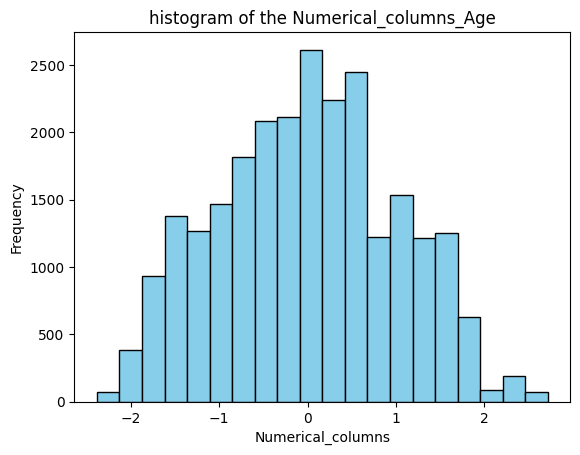

In [67]:
# histogram
plt.hist(Liver_data['Age'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Numerical_columns')
plt.ylabel('Frequency')
plt.title('histogram of the Numerical_columns_Age')
plt.show()

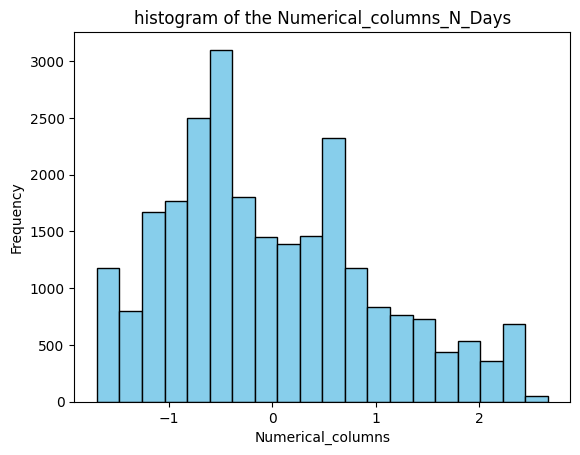

In [68]:
# histogram
plt.hist(Liver_data['N_Days'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Numerical_columns')
plt.ylabel('Frequency')
plt.title('histogram of the Numerical_columns_N_Days')
plt.show()

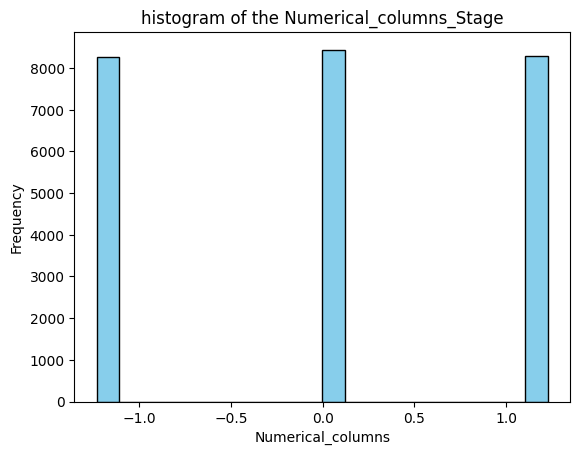

In [69]:
# histogram
plt.hist(Liver_data['Stage'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Numerical_columns')
plt.ylabel('Frequency')
plt.title('histogram of the Numerical_columns_Stage')
plt.show()

<ipython-input-70-4f381197e2fc>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Liver_data['Age'],shade = True, color = 'skyblue')


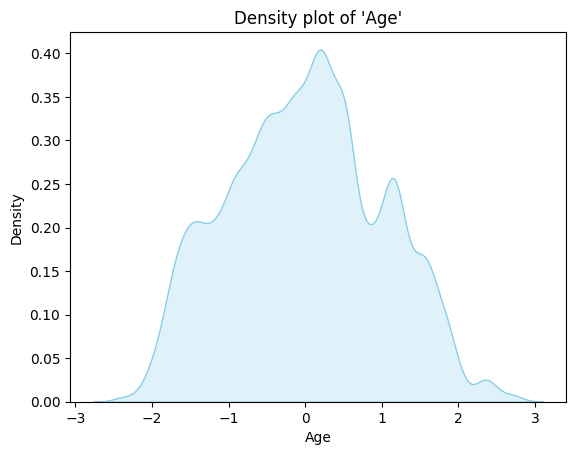

In [70]:
# Density plot
sns.kdeplot(Liver_data['Age'],shade = True, color = 'skyblue')
plt.xlabel ('Age')
plt.ylabel ('Density')
plt.title ("Density plot of 'Age'")
plt.show()

<ipython-input-71-37fff4bc15a2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Liver_data['N_Days'],shade = True, color = 'skyblue')


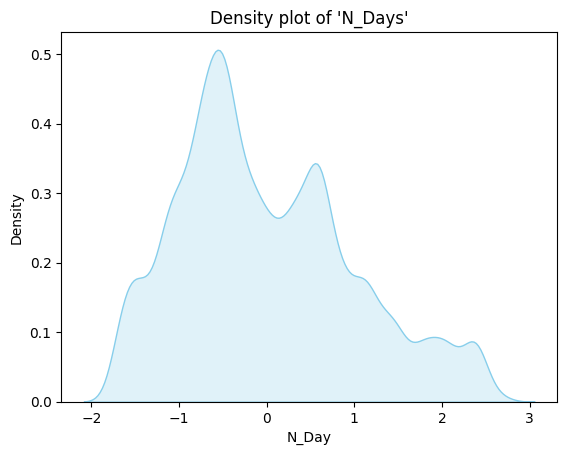

In [71]:
# Density plot
sns.kdeplot(Liver_data['N_Days'],shade = True, color = 'skyblue')
plt.xlabel ('N_Day')
plt.ylabel ('Density')
plt.title ("Density plot of 'N_Days'")
plt.show()

<ipython-input-72-271e36f60e1f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Liver_data['Stage'],shade = True, color = 'skyblue')


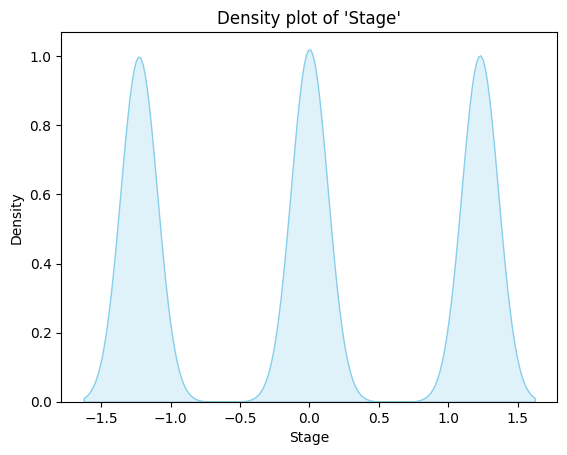

In [72]:
# Density plot
sns.kdeplot(Liver_data['Stage'],shade = True, color = 'skyblue')
plt.xlabel ('Stage')
plt.ylabel ('Density')
plt.title ("Density plot of 'Stage'")
plt.show()

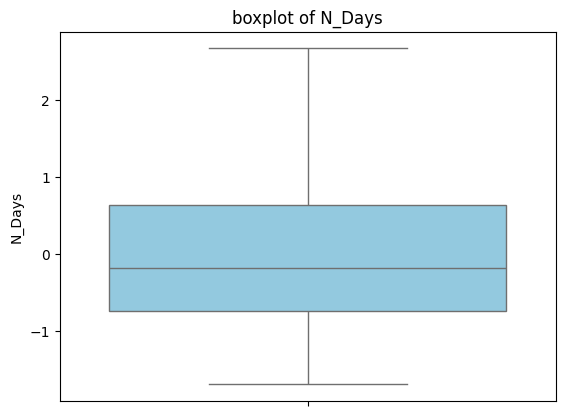

In [73]:
# Boxplot
sns.boxplot(y = Liver_data['N_Days'], color = 'skyblue')
plt.ylabel('N_Days')
plt.title('boxplot of N_Days')
plt.show()

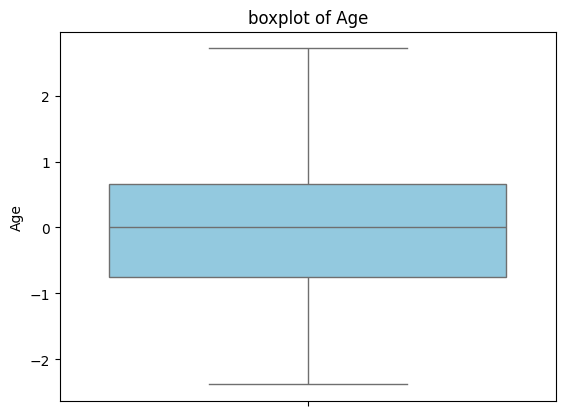

In [74]:
# Boxplot
sns.boxplot(y = Liver_data['Age'], color = 'skyblue')
plt.ylabel('Age')
plt.title('boxplot of Age')
plt.show()

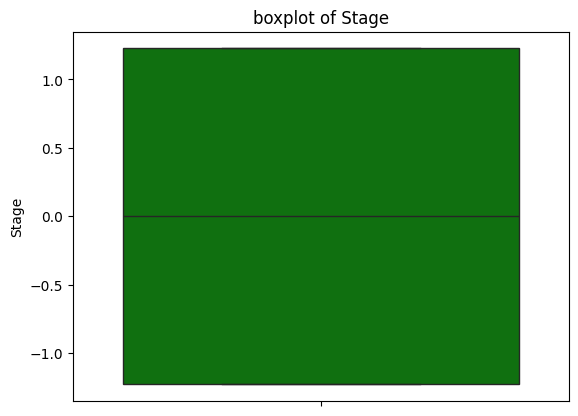

In [75]:
# Boxplot
sns.boxplot(y = Liver_data['Stage'], color = 'green')
plt.ylabel('Stage')
plt.title('boxplot of Stage')
plt.show()

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


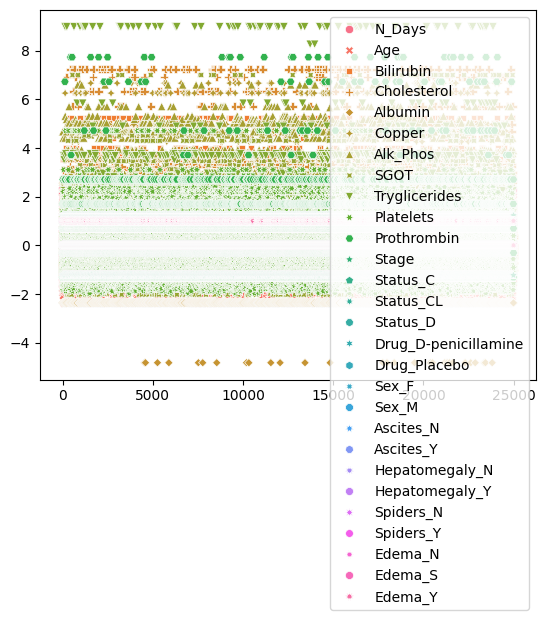

In [76]:
sns.scatterplot(Liver_data)

In [77]:
xaxis = Liver_data["N_Days"]
yaxis = Liver_data["Age"]

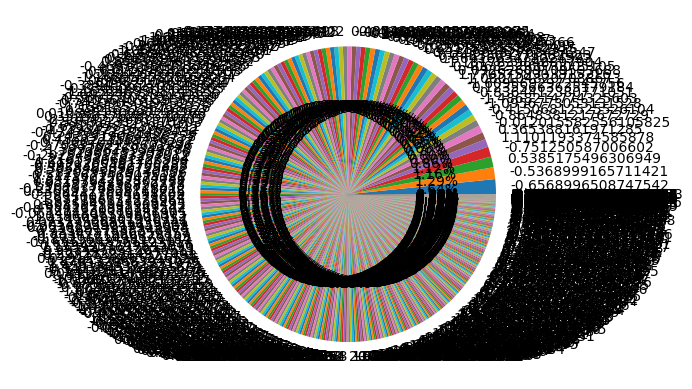

In [78]:
plt.pie(labels=Liver_data["N_Days"].value_counts().index,
        x=Liver_data["N_Days"].value_counts().values, autopct = '%1.2f%%')
plt.show();

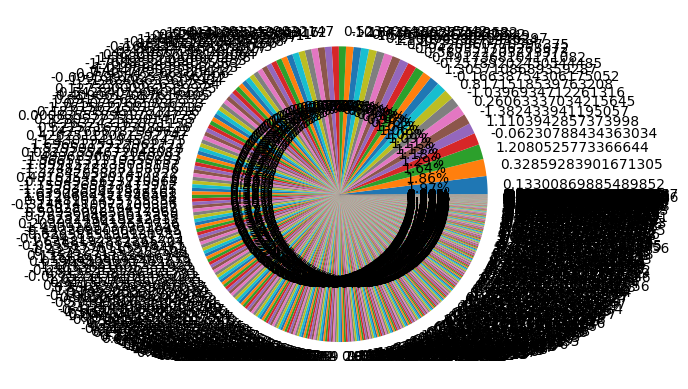

In [79]:
plt.pie(labels=Liver_data["Age"].value_counts().index,
        x=Liver_data["Age"].value_counts().values, autopct = '%1.2f%%')
plt.show();

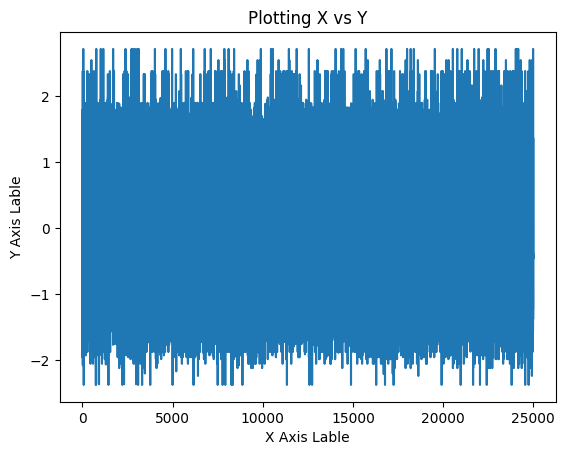

In [80]:
plt.plot(yaxis,)
plt.xlabel('X Axis Lable')
plt.ylabel('Y Axis Lable')
plt.title('Plotting X vs Y')
plt.show()

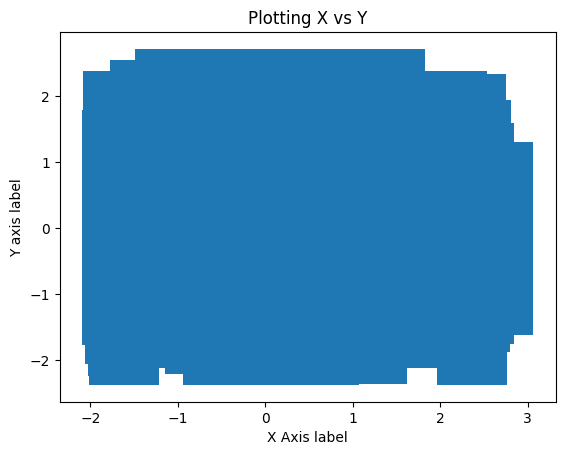

In [81]:
plt.bar(xaxis,yaxis)
plt.xlabel('X Axis label')
plt.ylabel('Y axis label')
plt.title('Plotting X vs Y')
plt.show()

<Axes: ylabel='Frequency'>

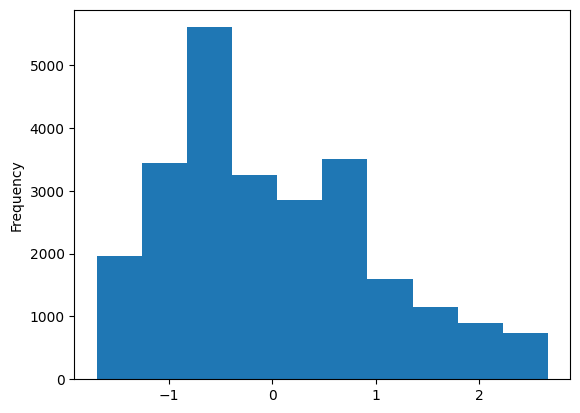

In [82]:
Liver_data['N_Days'].plot(kind = "hist")

<Axes: ylabel='Frequency'>

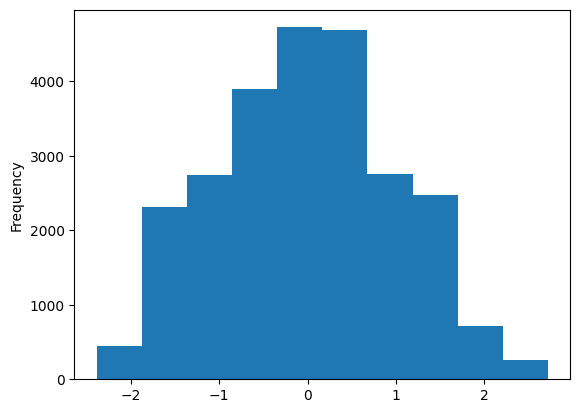

In [83]:
Liver_data['Age'].plot(kind = "hist")

<Axes: ylabel='Frequency'>

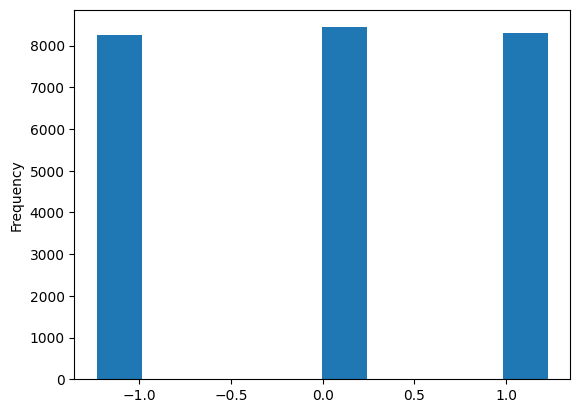

In [84]:
Liver_data['Stage'].plot(kind = "hist")

<ipython-input-85-790446ca188e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Liver_data["N_Days"], color = ('r'))


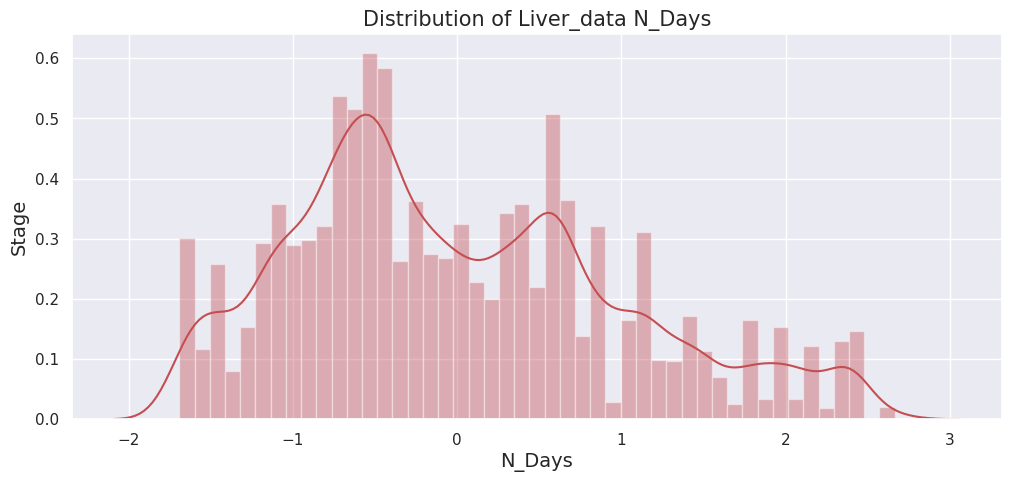

In [85]:
# Distribution of the N_Days
plt.figure (figsize = (12,5))
sns.set_theme(style = "darkgrid")
sns.distplot(Liver_data["N_Days"], color = ('r'))
plt.xlabel("N_Days", fontsize = 14)
plt.ylabel("Stage", fontsize = 14)
plt.title("Distribution of Liver_data N_Days", fontsize = 15)
plt.show()

In [86]:
min(Liver_data['N_Days'])

-1.6910958343005411

In [87]:
max(Liver_data['N_Days'])

2.6637036838626043

In [88]:
# difference
(max(Liver_data['N_Days']) - min(Liver_data['N_Days'])) / 10

0.4354799518163145

In [89]:
min(Liver_data['Age'])

-2.3806889712138393

In [90]:
max(Liver_data['Age'])

2.7168062933044785

In [91]:
# difference
(max(Liver_data['Age']) - min(Liver_data['Age'])) / 10

0.5097495264518318

In [92]:
min(Liver_data['Stage'])

-1.2301466323683994

In [93]:
max(Liver_data['Stage'])

1.2272959989161092

In [94]:
# difference
(max(Liver_data['Stage']) - min(Liver_data['Stage'])) / 10

0.24574426312845085

# N_Days #

In [95]:
# -1.6910958343005411 + 0.4354799518163145 : D1_N_Days
# D1_N_Days + 0.4354799518163145 : D2_N_Days
# D2_N_Days + 0.4354799518163145 : D3_N_Days
# N_Days_percentile_list = []
# for i in range(10):
#     difference  = (max(data['N_Days']) - min(data['N_Days'])) / 10
difference = (max(data['N_Days']) - min(data['N_Days'])) / 10
d1_N_Days  = min(data['N_Days']) + difference
d2_N_Days  = d1_N_Days + difference
d2_N_Days  = d1_N_Days + difference
d3_N_Days  = d2_N_Days + difference
d4_N_Days  = d3_N_Days + difference
d5_N_Days  = d4_N_Days + difference
d6_N_Days  = d5_N_Days + difference
d7_N_Days  = d6_N_Days + difference
d8_N_Days  = d7_N_Days + difference
d9_N_Days  = d8_N_Days + difference
d10_N_Days  = d9_N_Days + difference

In [96]:
print(f"d1_N_Days : {d1_N_Days}")
print(f"d2_N_Days : {d2_N_Days}")
print(f"d3_N_Days : {d3_N_Days}")
print(f"d4_N_Days : {d4_N_Days}")
print(f"d5_N_Days : {d5_N_Days}")
print(f"d6_N_Days : {d6_N_Days}")
print(f"d7_N_Days : {d7_N_Days}")
print(f"d8_N_Days : {d8_N_Days}")
print(f"d9_N_Days : {d9_N_Days}")
print(f"d10_N_Days : {d10_N_Days}")

d1_N_Days : 516.4
d2_N_Days : 991.8
d3_N_Days : 1467.1999999999998
d4_N_Days : 1942.6
d5_N_Days : 2418.0
d6_N_Days : 2893.4
d7_N_Days : 3368.8
d8_N_Days : 3844.2000000000003
d9_N_Days : 4319.6
d10_N_Days : 4795.0


In [97]:
d1_N_Days

516.4

In [98]:
d2_N_Days

991.8

In [99]:
d3_N_Days

1467.1999999999998

In [100]:
d4_N_Days

1942.6

In [101]:
d5_N_Days

2418.0

In [102]:
d6_N_Days

2893.4

In [103]:
d7_N_Days

3368.8

In [104]:
d8_N_Days

3844.2000000000003

In [105]:
d9_N_Days

4319.6

In [106]:
d10_N_Days

4795.0

In [107]:
d1_N_Days_list = []
d2_N_Days_list = []
d3_N_Days_list = []
d4_N_Days_list = []
d5_N_Days_list = []
d6_N_Days_list = []
d7_N_Days_list = []
d8_N_Days_list = []
d9_N_Days_list = []
d10_N_Days_list = []


for N_Days in data['N_Days']:
    if N_Days <= d1_N_Days:
        d1_N_Days_list.append(1)
        d2_N_Days_list.append(0)
        d3_N_Days_list.append(0)
        d4_N_Days_list.append(0)
        d5_N_Days_list.append(0)
        d6_N_Days_list.append(0)
        d7_N_Days_list.append(0)
        d8_N_Days_list.append(0)
        d9_N_Days_list.append(0)
        d10_N_Days_list.append(0)

    elif N_Days <= d2_N_Days:
        d1_N_Days_list.append(0)
        d2_N_Days_list.append(1)
        d3_N_Days_list.append(0)
        d4_N_Days_list.append(0)
        d5_N_Days_list.append(0)
        d6_N_Days_list.append(0)
        d7_N_Days_list.append(0)
        d8_N_Days_list.append(0)
        d9_N_Days_list.append(0)
        d10_N_Days_list.append(0)

    elif N_Days <= d3_N_Days:
        d1_N_Days_list.append(0)
        d2_N_Days_list.append(0)
        d3_N_Days_list.append(1)
        d4_N_Days_list.append(0)
        d5_N_Days_list.append(0)
        d6_N_Days_list.append(0)
        d7_N_Days_list.append(0)
        d8_N_Days_list.append(0)
        d9_N_Days_list.append(0)
        d10_N_Days_list.append(0)

    elif N_Days <= d4_N_Days:
        d1_N_Days_list.append(0)
        d2_N_Days_list.append(0)
        d3_N_Days_list.append(0)
        d4_N_Days_list.append(1)
        d5_N_Days_list.append(0)
        d6_N_Days_list.append(0)
        d7_N_Days_list.append(0)
        d8_N_Days_list.append(0)
        d9_N_Days_list.append(0)
        d10_N_Days_list.append(0)

    elif N_Days <= d5_N_Days:
        d1_N_Days_list.append(0)
        d2_N_Days_list.append(0)
        d3_N_Days_list.append(0)
        d4_N_Days_list.append(0)
        d5_N_Days_list.append(1)
        d6_N_Days_list.append(0)
        d7_N_Days_list.append(0)
        d8_N_Days_list.append(0)
        d9_N_Days_list.append(0)
        d10_N_Days_list.append(0)

    elif N_Days <= d6_N_Days:
        d1_N_Days_list.append(0)
        d2_N_Days_list.append(0)
        d3_N_Days_list.append(0)
        d4_N_Days_list.append(0)
        d5_N_Days_list.append(0)
        d6_N_Days_list.append(1)
        d7_N_Days_list.append(0)
        d8_N_Days_list.append(0)
        d9_N_Days_list.append(0)
        d10_N_Days_list.append(0)

    elif N_Days <= d7_N_Days:
        d1_N_Days_list.append(0)
        d2_N_Days_list.append(0)
        d3_N_Days_list.append(0)
        d4_N_Days_list.append(0)
        d5_N_Days_list.append(0)
        d6_N_Days_list.append(0)
        d7_N_Days_list.append(1)
        d8_N_Days_list.append(0)
        d9_N_Days_list.append(0)
        d10_N_Days_list.append(0)

    elif N_Days <= d8_N_Days:
        d1_N_Days_list.append(0)
        d2_N_Days_list.append(0)
        d3_N_Days_list.append(0)
        d4_N_Days_list.append(0)
        d5_N_Days_list.append(0)
        d6_N_Days_list.append(0)
        d7_N_Days_list.append(0)
        d8_N_Days_list.append(1)
        d9_N_Days_list.append(0)
        d10_N_Days_list.append(0)

    elif N_Days <= d9_N_Days:
        d1_N_Days_list.append(0)
        d2_N_Days_list.append(0)
        d3_N_Days_list.append(0)
        d4_N_Days_list.append(0)
        d5_N_Days_list.append(0)
        d6_N_Days_list.append(0)
        d7_N_Days_list.append(0)
        d8_N_Days_list.append(0)
        d9_N_Days_list.append(1)
        d10_N_Days_list.append(0)

    elif N_Days <= d10_N_Days:
        d1_N_Days_list.append(0)
        d2_N_Days_list.append(0)
        d3_N_Days_list.append(0)
        d4_N_Days_list.append(0)
        d5_N_Days_list.append(0)
        d6_N_Days_list.append(0)
        d7_N_Days_list.append(0)
        d8_N_Days_list.append(0)
        d9_N_Days_list.append(0)
        d10_N_Days_list.append(1)


In [108]:
N_Days_difference_from_median = []
for n_days in data["N_Days"]:
    difference = data["N_Days"].median() - n_days
    N_Days_difference_from_median.append(difference)

N_Days_difference_from_median_dataframe =  pd.DataFrame({"N_Days_MEDIAN_Difference": N_Days_difference_from_median})
# N_Days_difference_from_median_dataframe
data = pd.concat([Liver_data,N_Days_difference_from_median_dataframe], axis = 1)

<Axes: >

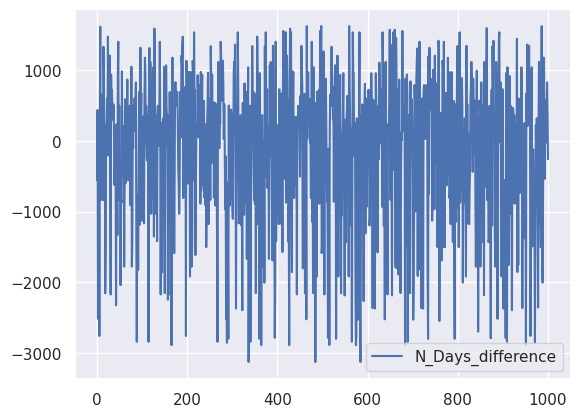

In [109]:
pd.DataFrame({"N_Days_difference": N_Days_difference_from_median}).loc[:1000].plot()

<Axes: >

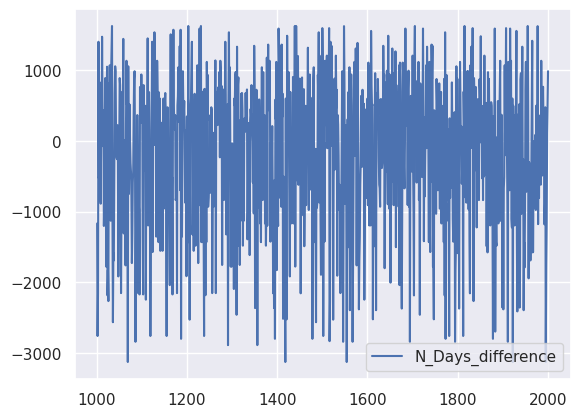

In [110]:
pd.DataFrame({"N_Days_difference": N_Days_difference_from_median}).loc[1001:2000].plot()

In [111]:
n_days_greater_than_less_than_median_list = []
for n_day in data["N_Days"]:
    if n_day > data["N_Days"].median():
        n_days_greater_than_less_than_median_list.append(1)
    else:
        n_days_greater_than_less_than_median_list.append(0)

In [112]:
N_Days_GREATER_THAN_MEDIAN_df = pd.DataFrame({"N_Days_GREATER_THAN_MEDIAN" : n_days_greater_than_less_than_median_list})

In [113]:
N_Days_GREATER_THAN_MEDIAN_df

N_Days_GREATER_THAN_MEDIAN
0                               1
1                               0
2                               1
3                               1
4                               1
...                           ...
24995                           1
24996                           1
24997                           0
24998                           1
24999                           1

[25000 rows x 1 columns]

In [114]:
data_1 = pd.concat([Liver_data, N_Days_GREATER_THAN_MEDIAN_df], axis = 1)

In [115]:
data_1[["N_Days", "N_Days_GREATER_THAN_MEDIAN"]]

N_Days  N_Days_GREATER_THAN_MEDIAN
0      0.305846                           1
1     -0.601938                           0
2      2.104010                           1
3      0.185847                           1
4      0.199587                           1
...         ...                         ...
24995  1.554393                           1
24996  1.554393                           1
24997 -0.839189                           0
24998  1.667065                           1
24999  1.667065                           1

[25000 rows x 2 columns]

In [116]:
data_1[["N_Days", "N_Days_GREATER_THAN_MEDIAN"]]

N_Days  N_Days_GREATER_THAN_MEDIAN
0      0.305846                           1
1     -0.601938                           0
2      2.104010                           1
3      0.185847                           1
4      0.199587                           1
...         ...                         ...
24995  1.554393                           1
24996  1.554393                           1
24997 -0.839189                           0
24998  1.667065                           1
24999  1.667065                           1

[25000 rows x 2 columns]

In [117]:
data_1["N_Days_GREATER_THAN_MEDIAN"].value_counts()

N_Days_GREATER_THAN_MEDIAN
0    12534
1    12466
Name: count, dtype: int64

# MODELLING PART ##

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [119]:
Liver_data.head()

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
0  0.305846  0.000836  -0.617290    -1.152295  2.551354  1.735067 -0.776907   
1 -0.601938  0.328593  -0.617290    -0.790850  0.092170 -1.065863 -0.740771   
2  2.104010 -1.781094  -0.617290    -0.269337  0.092170 -0.669634 -0.418329   
3  0.185847 -0.542840  -0.617290    -0.604964  0.092170 -1.052200 -0.540078   
4  0.199587  0.857018  -0.408056     0.587803  0.092170 -0.355383 -0.524512   

       SGOT  Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  \
0 -1.482082      -1.261499  -0.000066  ...  False       True      False   
1 -1.628718      -0.920476  -0.364893  ...   True      False       True   
2 -0.015720      -0.825748  -0.314222  ...  False       True      False   
3 -0.958381      -1.242553  -1.064144  ...  False       True      False   
4 -0.308993      -0.276322  -1.064144  ...  False       True      False   

   Hepatomegaly_N  Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  \
0           False            True       True      False     True    False   
1            True           False      False       True     True    False   
2            True           False       True      False     True    False   
3            True           False       True      False     True    False   
4           False            True       True      False     True    False   

   Edema_Y  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 28 columns]

In [120]:
Liver_data.shape

(25000, 28)

In [121]:
# Separate the features and the target
# Separate X and y


In [122]:
X = data.drop(["Stage"], axis =1)
y = data["Stage"]

In [123]:
X.shape

(25000, 28)

In [124]:
y.shape

(25000,)

In [125]:
# Define the train and the test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [126]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 28), (5000, 28), (20000,), (5000,))

In [127]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [128]:
Inference_data = pd.read_csv("/content/data_for_inference.csv")

In [129]:
Inference_data

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       3577      C          Placebo  16688   F       N            N       N   
1       1212      D          Placebo  12963   F       N            N       N   
2       1301     CL          Placebo  12738   F       N            Y       Y   
3       2666      C          Placebo  15909   F       N            Y       Y   
4       3388      C          Placebo  22836   F       N            N       N   
...      ...    ...              ...    ...  ..     ...          ...     ...   
4995    3584      D  D-penicillamine  23612   F       N            N       N   
4996    3584      D  D-penicillamine  23612   F       N            N       N   
4997     971      D  D-penicillamine  16736   F       N            Y       Y   
4998    3707      C  D-penicillamine  16990   F       N            Y       N   
4999    3707      C  D-penicillamine  16990   F       N            Y       N   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0        N        0.7   281.000000     3.85    40.0    1181.0   88.35   
1        N        1.3   408.000000     4.22    67.0    1387.0  142.60   
2        S        1.1   432.000000     3.57    45.0    1406.0  190.00   
3        S        0.6   220.000000     3.35    57.0    1620.0  153.45   
4        N        0.6   212.000000     4.03    10.0     648.0   71.30   
...    ...        ...          ...      ...     ...       ...     ...   
4995     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
4996     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
4997     Y        5.1   369.510563     3.23    18.0     790.0  179.80   
4998     N        0.8   315.000000     4.24    13.0    1637.0  170.50   
4999     N        0.8   315.000000     4.24    13.0    1637.0  170.50   

      Tryglicerides  Platelets  Prothrombin  
0        130.000000      244.0         10.6  
1        137.000000      295.0         10.1  
2         77.000000      248.0         11.4  
3         80.000000      311.0         11.2  
4         77.000000      316.0         17.1  
...             ...        ...          ...  
4995      96.000000      295.0         11.0  
4996      96.000000      295.0         11.0  
4997     124.702128      104.0         13.0  
4998      70.000000      426.0         10.9  
4999      70.000000      426.0         10.9  

[5000 rows x 18 columns]

In [130]:
Inference_data.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    3577      C  Placebo  16688   F       N            N       N     N   
1    1212      D  Placebo  12963   F       N            N       N     N   
2    1301     CL  Placebo  12738   F       N            Y       Y     S   
3    2666      C  Placebo  15909   F       N            Y       Y     S   
4    3388      C  Placebo  22836   F       N            N       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.7        281.0     3.85    40.0    1181.0   88.35          130.0   
1        1.3        408.0     4.22    67.0    1387.0  142.60          137.0   
2        1.1        432.0     3.57    45.0    1406.0  190.00           77.0   
3        0.6        220.0     3.35    57.0    1620.0  153.45           80.0   
4        0.6        212.0     4.03    10.0     648.0   71.30           77.0   

   Platelets  Prothrombin  
0      244.0         10.6  
1      295.0         10.1  
2      248.0         11.4  
3      311.0         11.2  
4      316.0         17.1

In [131]:
Inference_data.tail()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
4995    3584      D  D-penicillamine  23612   F       N            N       N   
4996    3584      D  D-penicillamine  23612   F       N            N       N   
4997     971      D  D-penicillamine  16736   F       N            Y       Y   
4998    3707      C  D-penicillamine  16990   F       N            Y       N   
4999    3707      C  D-penicillamine  16990   F       N            Y       N   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
4995     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
4996     N        0.8   231.000000     3.87   173.0    9009.8  127.71   
4997     Y        5.1   369.510563     3.23    18.0     790.0  179.80   
4998     N        0.8   315.000000     4.24    13.0    1637.0  170.50   
4999     N        0.8   315.000000     4.24    13.0    1637.0  170.50   

      Tryglicerides  Platelets  Prothrombin  
4995      96.000000      295.0         11.0  
4996      96.000000      295.0         11.0  
4997     124.702128      104.0         13.0  
4998      70.000000      426.0         10.9  
4999      70.000000      426.0         10.9

In [132]:
Inference_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         5000 non-null   int64  
 1   Status         5000 non-null   object 
 2   Drug           5000 non-null   object 
 3   Age            5000 non-null   int64  
 4   Sex            5000 non-null   object 
 5   Ascites        5000 non-null   object 
 6   Hepatomegaly   5000 non-null   object 
 7   Spiders        5000 non-null   object 
 8   Edema          5000 non-null   object 
 9   Bilirubin      5000 non-null   float64
 10  Cholesterol    5000 non-null   float64
 11  Albumin        5000 non-null   float64
 12  Copper         5000 non-null   float64
 13  Alk_Phos       5000 non-null   float64
 14  SGOT           5000 non-null   float64
 15  Tryglicerides  5000 non-null   float64
 16  Platelets      5000 non-null   float64
 17  Prothrombin    5000 non-null   float64
dtypes: float

In [133]:
Inference_data.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
dtype: object

In [134]:
Inference_data["Bilirubin"] = Inference_data["Bilirubin"].astype("int64")# Data type Conversion
Inference_data["Cholesterol"] = Inference_data["Cholesterol"].astype("int64")# Data type Conversion
Inference_data["Albumin"] = Inference_data["Albumin"].astype("int64")# Data type Conversion
Inference_data["Copper"] = Inference_data["Copper"].astype("int64")# Data type Conversion
Inference_data["Alk_Phos"] = Inference_data["Alk_Phos"].astype("int64")# Data type Conversion
Inference_data["SGOT"] = Inference_data["SGOT"].astype("int64")# Data type Conversion
Inference_data["Tryglicerides"] = Inference_data["Tryglicerides"].astype("int64")# Data type Conversion
Inference_data["Platelets"] = Inference_data["Platelets"].astype("int64")# Data type Conversion
Inference_data["Prothrombin"] = Inference_data["Prothrombin"].astype("int64")# Data type Conversion

In [135]:
Inference_data.dtypes

N_Days            int64
Status           object
Drug             object
Age               int64
Sex              object
Ascites          object
Hepatomegaly     object
Spiders          object
Edema            object
Bilirubin         int64
Cholesterol       int64
Albumin           int64
Copper            int64
Alk_Phos          int64
SGOT              int64
Tryglicerides     int64
Platelets         int64
Prothrombin       int64
dtype: object

In [136]:
Inference_data.isnull()

N_Days  Status   Drug    Age    Sex  Ascites  Hepatomegaly  Spiders  \
0      False   False  False  False  False    False         False    False   
1      False   False  False  False  False    False         False    False   
2      False   False  False  False  False    False         False    False   
3      False   False  False  False  False    False         False    False   
4      False   False  False  False  False    False         False    False   
...      ...     ...    ...    ...    ...      ...           ...      ...   
4995   False   False  False  False  False    False         False    False   
4996   False   False  False  False  False    False         False    False   
4997   False   False  False  False  False    False         False    False   
4998   False   False  False  False  False    False         False    False   
4999   False   False  False  False  False    False         False    False   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  \
0     False      False        False    False   False     False  False   
1     False      False        False    False   False     False  False   
2     False      False        False    False   False     False  False   
3     False      False        False    False   False     False  False   
4     False      False        False    False   False     False  False   
...     ...        ...          ...      ...     ...       ...    ...   
4995  False      False        False    False   False     False  False   
4996  False      False        False    False   False     False  False   
4997  False      False        False    False   False     False  False   
4998  False      False        False    False   False     False  False   
4999  False      False        False    False   False     False  False   

      Tryglicerides  Platelets  Prothrombin  
0             False      False        False  
1             False      False        False  
2             False      False        False  
3             False      False        False  
4             False      False        False  
...             ...        ...          ...  
4995          False      False        False  
4996          False      False        False  
4997          False      False        False  
4998          False      False        False  
4999          False      False        False  

[5000 rows x 18 columns]

In [137]:
Inference_data.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

In [138]:
Inference_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [139]:
Inference_data.dropna()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       3577      C          Placebo  16688   F       N            N       N   
1       1212      D          Placebo  12963   F       N            N       N   
2       1301     CL          Placebo  12738   F       N            Y       Y   
3       2666      C          Placebo  15909   F       N            Y       Y   
4       3388      C          Placebo  22836   F       N            N       N   
...      ...    ...              ...    ...  ..     ...          ...     ...   
4995    3584      D  D-penicillamine  23612   F       N            N       N   
4996    3584      D  D-penicillamine  23612   F       N            N       N   
4997     971      D  D-penicillamine  16736   F       N            Y       Y   
4998    3707      C  D-penicillamine  16990   F       N            Y       N   
4999    3707      C  D-penicillamine  16990   F       N            Y       N   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0        N          0          281        3      40      1181    88   
1        N          1          408        4      67      1387   142   
2        S          1          432        3      45      1406   190   
3        S          0          220        3      57      1620   153   
4        N          0          212        4      10       648    71   
...    ...        ...          ...      ...     ...       ...   ...   
4995     N          0          231        3     173      9009   127   
4996     N          0          231        3     173      9009   127   
4997     Y          5          369        3      18       790   179   
4998     N          0          315        4      13      1637   170   
4999     N          0          315        4      13      1637   170   

      Tryglicerides  Platelets  Prothrombin  
0               130        244           10  
1               137        295           10  
2                77        248           11  
3                80        311           11  
4                77        316           17  
...             ...        ...          ...  
4995             96        295           11  
4996             96        295           11  
4997            124        104           13  
4998             70        426           10  
4999             70        426           10  

[5000 rows x 18 columns]

In [140]:
Inference_data.drop_duplicates() #Drop duplicates based on specific columns

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       3577      C          Placebo  16688   F       N            N       N   
1       1212      D          Placebo  12963   F       N            N       N   
2       1301     CL          Placebo  12738   F       N            Y       Y   
3       2666      C          Placebo  15909   F       N            Y       Y   
4       3388      C          Placebo  22836   F       N            N       N   
...      ...    ...              ...    ...  ..     ...          ...     ...   
4971    4795      C          Placebo  23376   F       Y            N       Y   
4972    3358      D  D-penicillamine  24585   F       N            Y       N   
4988    1149      C  D-penicillamine  13879   F       N            N       N   
4991    4365      C  D-penicillamine  21324   F       N            N       N   
4992     694      D  D-penicillamine  28650   M       Y            Y       Y   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0        N          0          281        3      40      1181    88   
1        N          1          408        4      67      1387   142   
2        S          1          432        3      45      1406   190   
3        S          0          220        3      57      1620   153   
4        N          0          212        4      10       648    71   
...    ...        ...          ...      ...     ...       ...   ...   
4971     N          1          369        3      97      1982   122   
4972     N          2          262        3      58      2045    89   
4988     N          0          273        3      52      1282   130   
4991     N          0          346        3      81      1098   122   
4992     N          0          300        2     231      1794   130   

      Tryglicerides  Platelets  Prothrombin  
0               130        244           10  
1               137        295           10  
2                77        248           11  
3                80        311           11  
4                77        316           17  
...             ...        ...          ...  
4971            124        139           10  
4972             84        412           11  
4988             59        335           10  
4991             90        228           10  
4992             99         97           11  

[960 rows x 18 columns]

In [141]:
Inference_data.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')

In [142]:
numerical_list = []
categorical_list = []

for col in data.columns:
  if data[col].dtype == "object":
    categorical_list.append(col)
  else:
    numerical_list.append(col)

In [143]:
numerical_list

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'Status_C',
 'Status_CL',
 'Status_D',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Sex_F',
 'Sex_M',
 'Ascites_N',
 'Ascites_Y',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Spiders_N',
 'Spiders_Y',
 'Edema_N',
 'Edema_S',
 'Edema_Y',
 'N_Days_MEDIAN_Difference']

In [144]:
categorical_list

[]

In [145]:
# Encoding using One-hot encoder
Inference_data = pd.get_dummies(Inference_data,columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

In [146]:
Inference_data.head()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0    3577  16688          0          281        3      40      1181    88   
1    1212  12963          1          408        4      67      1387   142   
2    1301  12738          1          432        3      45      1406   190   
3    2666  15909          0          220        3      57      1620   153   
4    3388  22836          0          212        4      10       648    71   

   Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  Hepatomegaly_N  \
0            130        244  ...  False       True      False            True   
1            137        295  ...  False       True      False            True   
2             77        248  ...  False       True      False           False   
3             80        311  ...  False       True      False           False   
4             77        316  ...  False       True      False            True   

   Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  
0           False       True      False     True    False    False  
1           False       True      False     True    False    False  
2            True      False       True    False     True    False  
3            True      False       True    False     True    False  
4           False       True      False     True    False    False  

[5 rows x 27 columns]

In [147]:
# Feature Scaling
# Scale the features to have a mean of 0 and std of 1
scaler = StandardScaler()

In [148]:
Liver_data[numerical_columns]= scaler.fit_transform(Liver_data[numerical_columns])

In [149]:
Liver_data[numerical_columns]

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0      0.305846  0.000836  -0.617290    -1.152295  2.551354  1.735067   
1     -0.601938  0.328593  -0.617290    -0.790850  0.092170 -1.065863   
2      2.104010 -1.781094  -0.617290    -0.269337  0.092170 -0.669634   
3      0.185847 -0.542840  -0.617290    -0.604964  0.092170 -1.052200   
4      0.199587  0.857018  -0.408056     0.587803  0.092170 -0.355383   
...         ...       ...        ...          ...       ...       ...   
24995  1.554393  1.368854  -0.617290    -0.728888  0.092170  0.997261   
24996  1.554393  1.368854  -0.617290    -0.728888  0.092170  0.997261   
24997 -0.839189 -0.470867   0.428879    -0.016326  0.092170 -1.120515   
24998  1.667065 -0.402908  -0.617290    -0.295155  2.551354 -1.188831   
24999  1.667065 -0.402908  -0.617290    -0.295155  2.551354 -1.188831   

       Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin     Stage  
0     -0.776907 -1.482082      -1.261499  -0.000066    -1.314055 -1.230147  
1     -0.740771 -1.628718      -0.920476  -0.364893    -0.308780 -0.001425  
2     -0.418329 -0.015720      -0.825748  -0.314222    -0.308780 -0.001425  
3     -0.540078 -0.958381      -1.242553  -1.064144    -0.308780 -0.001425  
4     -0.524512 -0.308993      -0.276322  -1.064144     0.696495 -1.230147  
...         ...       ...            ...        ...          ...       ...  
24995  3.899063  0.089020      -0.522616   0.395163     0.696495 -0.001425  
24996  3.899063  0.089020      -0.522616   0.395163     0.696495 -0.001425  
24997 -0.670167  1.178317       0.007864  -1.540445     2.707045  1.227296  
24998 -0.199290  0.989785      -1.015205   1.722726    -0.308780 -0.001425  
24999 -0.199290  0.989785      -1.015205   1.722726    -0.308780 -0.001425  

[25000 rows x 12 columns]

In [150]:
Inference_data.mean()

N_Days                   1914.3732
Age                     18602.2832
Bilirubin                   2.5750
Cholesterol               371.6508
Albumin                     2.9964
Copper                     95.8220
Alk_Phos                 1887.4834
SGOT                      121.7286
Tryglicerides             123.0658
Platelets                 260.0146
Prothrombin                10.2824
Status_C                    0.5698
Status_CL                   0.0650
Status_D                    0.3652
Drug_D-penicillamine        0.3664
Drug_Placebo                0.6336
Sex_F                       0.8966
Sex_M                       0.1034
Ascites_N                   0.6498
Ascites_Y                   0.3502
Hepatomegaly_N              0.6470
Hepatomegaly_Y              0.3530
Spiders_N                   0.5204
Spiders_Y                   0.4796
Edema_N                     0.8534
Edema_S                     0.1126
Edema_Y                     0.0340
dtype: float64

In [151]:
Inference_data.mode()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0    1925  23011          0          369        3      97      1982   122   

   Tryglicerides  Platelets  ...  Sex_M  Ascites_N  Ascites_Y  Hepatomegaly_N  \
0            124        257  ...  False       True      False            True   

   Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  
0           False       True      False     True    False    False  

[1 rows x 27 columns]

In [152]:
Inference_data.median()

N_Days                   1725.0
Age                     18701.0
Bilirubin                   1.0
Cholesterol               369.0
Albumin                     3.0
Copper                     97.0
Alk_Phos                 1840.0
SGOT                      122.0
Tryglicerides             124.0
Platelets                 255.0
Prothrombin                10.0
Status_C                    1.0
Status_CL                   0.0
Status_D                    0.0
Drug_D-penicillamine        0.0
Drug_Placebo                1.0
Sex_F                       1.0
Sex_M                       0.0
Ascites_N                   1.0
Ascites_Y                   0.0
Hepatomegaly_N              1.0
Hepatomegaly_Y              0.0
Spiders_N                   1.0
Spiders_Y                   0.0
Edema_N                     1.0
Edema_S                     0.0
Edema_Y                     0.0
dtype: float64

In [153]:
Inference_data["Cholesterol"].nunique() # How many unique neighborhood groups

202

In [154]:
Inference_data["Cholesterol"].unique()

array([ 281,  408,  432,  220,  212,  358,  262,  328,  478,  317,  369,
        556,  210,  414,  347, 1000,  267,  263,  247,  222,  217,  486,
        364,  646,  374,  274,  436,  558, 1600,  420,  132,  360,  232,
        298,  244,  280,  291,  299,  302,  426,  316,  273,  356,  223,
        390,  248,  282,  361,  246,  344,  191,  257,  269,  416,  196,
        460,  213,  528,  448,  239,  235,  324,  242,  375,  373,  258,
       1775,  331,  205, 1128,  464,  336,  219,  427,  456,  318,  674,
        206,  442,  604,  376,  149,  320,  332,  342,  236,  120,  178,
        578,  260,  259,  151,  932,  404,  127,  354,  339,  294,  226,
        310,  614,  293,  400,  296,  216,  215,  372,  340,  546,  370,
        283,  233,  290,  636, 1712,  325,  322,  412,  252,  338,  200,
        175, 1336,  256,  168,  266,  387,  308, 1276,  518,  314,  345,
       1015,  652,  608,  309, 1092,  227,  586,  288,  300,  172,  255,
        468,  276,  174,  660,  243,  502,  188,  3

#Univariate Analysis

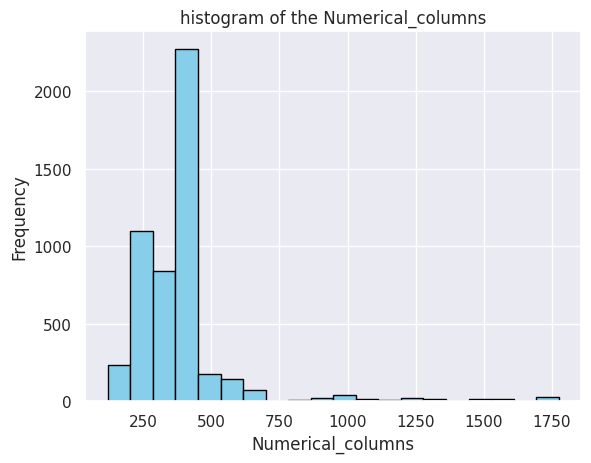

In [155]:
# histogram
plt.hist(Inference_data['Cholesterol'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Numerical_columns')
plt.ylabel('Frequency')
plt.title('histogram of the Numerical_columns')
plt.show()

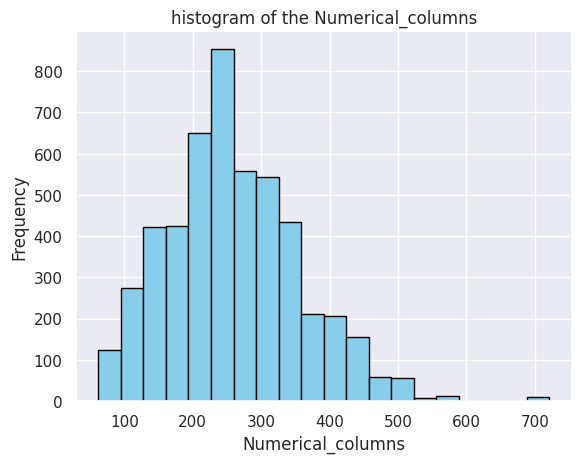

In [156]:
# histogram
plt.hist(Inference_data['Platelets'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Numerical_columns')
plt.ylabel('Frequency')
plt.title('histogram of the Numerical_columns')
plt.show()

<Axes: ylabel='Frequency'>

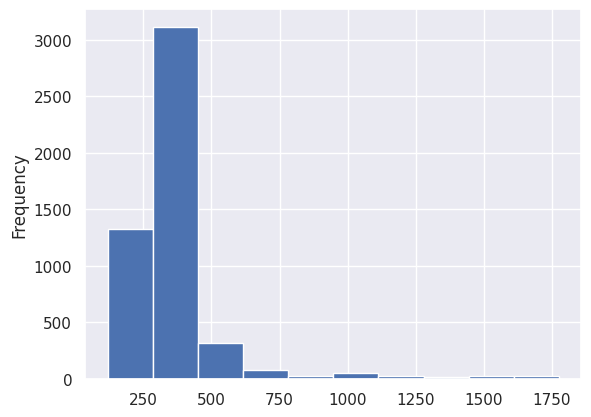

In [157]:
Inference_data['Cholesterol'].plot(kind = "hist")

<ipython-input-158-c9338073ee3a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Inference_data["Cholesterol"], color = ('r'))


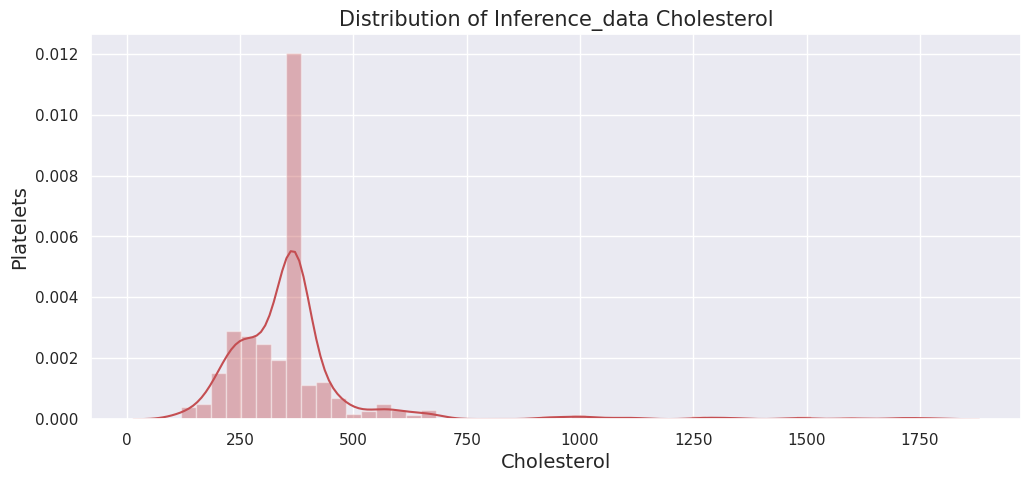

In [158]:
# Distribution of the N_Days
plt.figure (figsize = (12,5))
sns.set_theme(style = "darkgrid")
sns.distplot(Inference_data["Cholesterol"], color = ('r'))
plt.xlabel("Cholesterol", fontsize = 14)
plt.ylabel("Platelets", fontsize = 14)
plt.title("Distribution of Inference_data Cholesterol", fontsize = 15)
plt.show()

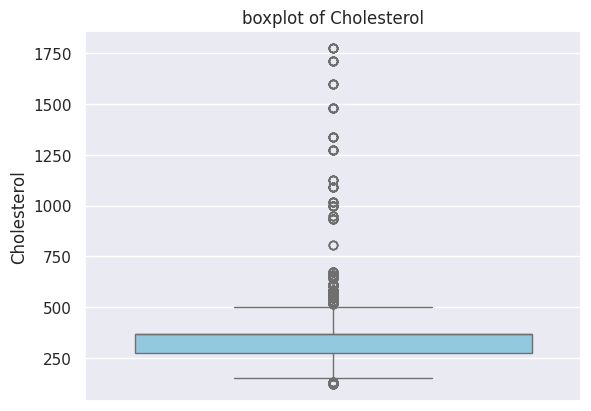

In [159]:
# Boxplot
sns.boxplot(y = Inference_data['Cholesterol'], color = 'skyblue')
plt.ylabel('Cholesterol')
plt.title('boxplot of Cholesterol')
plt.show()

<ipython-input-160-44bff0f4cf3d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Inference_data['Cholesterol'],shade = True, color = 'skyblue')


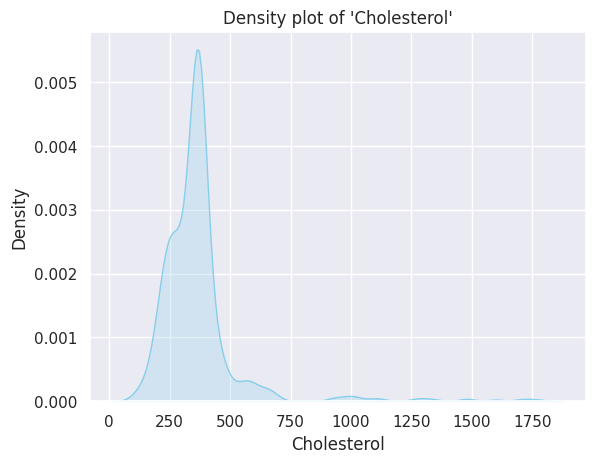

In [160]:
# Density plot
sns.kdeplot(Inference_data['Cholesterol'],shade = True, color = 'skyblue')
plt.xlabel ('Cholesterol')
plt.ylabel ('Density')
plt.title ("Density plot of 'Cholesterol'")
plt.show()

<ipython-input-161-a614ba7fd97a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Inference_data['Platelets'],shade = True, color = 'skyblue')


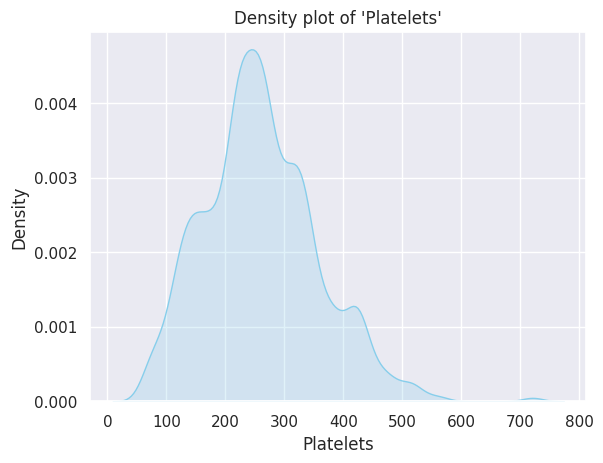

In [161]:
# Density plot
sns.kdeplot(Inference_data['Platelets'],shade = True, color = 'skyblue')
plt.xlabel ('Platelets')
plt.ylabel ('Density')
plt.title ("Density plot of 'Platelets'")
plt.show()

In [162]:
#### Preparing data for inference.
data_Training = pd.read_csv("Training_and_Valiation_data.csv")


In [163]:
data_Training

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0        2221      C  Placebo  18499   F       N            Y       N     N   
1        1230      C  Placebo  19724   M       Y            N       Y     N   
2        4184      C  Placebo  11839   F       N            N       N     N   
3        2090      D  Placebo  16467   F       N            N       N     N   
4        2105      D  Placebo  21699   F       N            Y       N     N   
...       ...    ...      ...    ...  ..     ...          ...     ...   ...   
19995    4196      C  Placebo  17841   F       N            Y       N     N   
19996    4256      C  Placebo  16034   M       N            N       N     N   
19997    2504      C  Placebo  16094   F       N            N       N     N   
19998    1030      C  Placebo  18302   M       N            N       N     N   
19999    1329      C  Placebo  14610   F       Y            N       Y     N   

       Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0            0.5        149.0     4.04   227.0     598.0   52.70   
1            0.5        219.0     3.93    22.0     663.0   45.00   
2            0.5        320.0     3.54    51.0    1243.0  122.45   
3            0.7        255.0     3.74    23.0    1024.0   77.50   
4            1.9        486.0     3.54    74.0    1052.0  108.50   
...          ...          ...      ...     ...       ...     ...   
19995        1.2        258.0     3.57    79.0    2201.0  120.90   
19996        0.6        216.0     3.94    28.0     601.0   60.45   
19997        0.5        120.0     3.61    53.0     804.0  110.05   
19998        1.1        412.0     3.99   103.0    1293.0   91.00   
19999        8.6        546.0     3.73    84.0    1070.0  127.00   

       Tryglicerides  Platelets  Prothrombin  Stage  
0               57.0      256.0          9.9      1  
1               75.0      220.0         10.8      2  
2               80.0      225.0         10.0      2  
3               58.0      151.0         10.2      2  
4              109.0      151.0         11.5      1  
...              ...        ...          ...    ...  
19995           76.0      410.0         11.5      3  
19996          188.0      211.0         13.0      1  
19997           52.0      271.0         10.6      2  
19998          113.0      182.0         10.8      3  
19999          153.0      145.0         10.4      2  

[20000 rows x 19 columns]

In [164]:
data_Training.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [165]:
data_Training.tail()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
19995    4196      C  Placebo  17841   F       N            Y       N     N   
19996    4256      C  Placebo  16034   M       N            N       N     N   
19997    2504      C  Placebo  16094   F       N            N       N     N   
19998    1030      C  Placebo  18302   M       N            N       N     N   
19999    1329      C  Placebo  14610   F       Y            N       Y     N   

       Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
19995        1.2        258.0     3.57    79.0    2201.0  120.90   
19996        0.6        216.0     3.94    28.0     601.0   60.45   
19997        0.5        120.0     3.61    53.0     804.0  110.05   
19998        1.1        412.0     3.99   103.0    1293.0   91.00   
19999        8.6        546.0     3.73    84.0    1070.0  127.00   

       Tryglicerides  Platelets  Prothrombin  Stage  
19995           76.0      410.0         11.5      3  
19996          188.0      211.0         13.0      1  
19997           52.0      271.0         10.6      2  
19998          113.0      182.0         10.8      3  
19999          153.0      145.0         10.4      2

In [166]:
data_Training.shape

(20000, 19)

In [167]:
data_Training.shape[0]

20000

In [168]:
data_Training.shape[1]

19

In [169]:
data_Training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         20000 non-null  int64  
 1   Status         20000 non-null  object 
 2   Drug           20000 non-null  object 
 3   Age            20000 non-null  int64  
 4   Sex            20000 non-null  object 
 5   Ascites        20000 non-null  object 
 6   Hepatomegaly   20000 non-null  object 
 7   Spiders        20000 non-null  object 
 8   Edema          20000 non-null  object 
 9   Bilirubin      20000 non-null  float64
 10  Cholesterol    20000 non-null  float64
 11  Albumin        20000 non-null  float64
 12  Copper         20000 non-null  float64
 13  Alk_Phos       20000 non-null  float64
 14  SGOT           20000 non-null  float64
 15  Tryglicerides  20000 non-null  float64
 16  Platelets      20000 non-null  float64
 17  Prothrombin    20000 non-null  float64
 18  Stage 

In [170]:
data_Training.isnull()

N_Days  Status   Drug    Age    Sex  Ascites  Hepatomegaly  Spiders  \
0       False   False  False  False  False    False         False    False   
1       False   False  False  False  False    False         False    False   
2       False   False  False  False  False    False         False    False   
3       False   False  False  False  False    False         False    False   
4       False   False  False  False  False    False         False    False   
...       ...     ...    ...    ...    ...      ...           ...      ...   
19995   False   False  False  False  False    False         False    False   
19996   False   False  False  False  False    False         False    False   
19997   False   False  False  False  False    False         False    False   
19998   False   False  False  False  False    False         False    False   
19999   False   False  False  False  False    False         False    False   

       Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  \
0      False      False        False    False   False     False  False   
1      False      False        False    False   False     False  False   
2      False      False        False    False   False     False  False   
3      False      False        False    False   False     False  False   
4      False      False        False    False   False     False  False   
...      ...        ...          ...      ...     ...       ...    ...   
19995  False      False        False    False   False     False  False   
19996  False      False        False    False   False     False  False   
19997  False      False        False    False   False     False  False   
19998  False      False        False    False   False     False  False   
19999  False      False        False    False   False     False  False   

       Tryglicerides  Platelets  Prothrombin  Stage  
0              False      False        False  False  
1              False      False        False  False  
2              False      False        False  False  
3              False      False        False  False  
4              False      False        False  False  
...              ...        ...          ...    ...  
19995          False      False        False  False  
19996          False      False        False  False  
19997          False      False        False  False  
19998          False      False        False  False  
19999          False      False        False  False  

[20000 rows x 19 columns]

In [171]:
data_Training.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [172]:
inference_actuals = pd.read_csv("/content/inference_actuals.csv")

In [173]:
concatenate_df=pd.concat([Liver_data,Inference_data,inference_actuals,data_Training],axis=0) #Data ko concatenate karna
concatenate_df

N_Days           Age  Bilirubin  Cholesterol   Albumin  \
0         0.305846      0.000836  -0.617290    -1.152295  2.551354   
1        -0.601938      0.328593  -0.617290    -0.790850  0.092170   
2         2.104010     -1.781094  -0.617290    -0.269337  0.092170   
3         0.185847     -0.542840  -0.617290    -0.604964  0.092170   
4         0.199587      0.857018  -0.408056     0.587803  0.092170   
...            ...           ...        ...          ...       ...   
19995  4196.000000  17841.000000   1.200000   258.000000  3.570000   
19996  4256.000000  16034.000000   0.600000   216.000000  3.940000   
19997  2504.000000  16094.000000   0.500000   120.000000  3.610000   
19998  1030.000000  18302.000000   1.100000   412.000000  3.990000   
19999  1329.000000  14610.000000   8.600000   546.000000  3.730000   

           Copper     Alk_Phos        SGOT  Tryglicerides   Platelets  ...  \
0        1.735067    -0.776907   -1.482082      -1.261499   -0.000066  ...   
1       -1.065863    -0.740771   -1.628718      -0.920476   -0.364893  ...   
2       -0.669634    -0.418329   -0.015720      -0.825748   -0.314222  ...   
3       -1.052200    -0.540078   -0.958381      -1.242553   -1.064144  ...   
4       -0.355383    -0.524512   -0.308993      -0.276322   -1.064144  ...   
...           ...          ...         ...            ...         ...  ...   
19995   79.000000  2201.000000  120.900000      76.000000  410.000000  ...   
19996   28.000000   601.000000   60.450000     188.000000  211.000000  ...   
19997   53.000000   804.000000  110.050000      52.000000  271.000000  ...   
19998  103.000000  1293.000000   91.000000     113.000000  182.000000  ...   
19999   84.000000  1070.000000  127.000000     153.000000  145.000000  ...   

       Edema_N  Edema_S Edema_Y Status     Drug  Sex Ascites Hepatomegaly  \
0         True    False   False    NaN      NaN  NaN     NaN          NaN   
1         True    False   False    NaN      NaN  NaN     NaN          NaN   
2         True    False   False    NaN      NaN  NaN     NaN          NaN   
3         True    False   False    NaN      NaN  NaN     NaN          NaN   
4         True    False   False    NaN      NaN  NaN     NaN          NaN   
...        ...      ...     ...    ...      ...  ...     ...          ...   
19995      NaN      NaN     NaN      C  Placebo    F       N            Y   
19996      NaN      NaN     NaN      C  Placebo    M       N            N   
19997      NaN      NaN     NaN      C  Placebo    F       N            N   
19998      NaN      NaN     NaN      C  Placebo    M       N            N   
19999      NaN      NaN     NaN      C  Placebo    F       Y            N   

      Spiders Edema  
0         NaN   NaN  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  
...       ...   ...  
19995       N     N  
19996       N     N  
19997       N     N  
19998       N     N  
19999       Y     N  

[55000 rows x 35 columns]

In [174]:
concatenate_df.shape

(55000, 35)

In [175]:
concatenate_df.shape[0]

55000

In [176]:
concatenate_df.shape[1]

35

In [177]:
concatenate_df.head()

N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
0  0.305846  0.000836  -0.617290    -1.152295  2.551354  1.735067 -0.776907   
1 -0.601938  0.328593  -0.617290    -0.790850  0.092170 -1.065863 -0.740771   
2  2.104010 -1.781094  -0.617290    -0.269337  0.092170 -0.669634 -0.418329   
3  0.185847 -0.542840  -0.617290    -0.604964  0.092170 -1.052200 -0.540078   
4  0.199587  0.857018  -0.408056     0.587803  0.092170 -0.355383 -0.524512   

       SGOT  Tryglicerides  Platelets  ...  Edema_N  Edema_S Edema_Y Status  \
0 -1.482082      -1.261499  -0.000066  ...     True    False   False    NaN   
1 -1.628718      -0.920476  -0.364893  ...     True    False   False    NaN   
2 -0.015720      -0.825748  -0.314222  ...     True    False   False    NaN   
3 -0.958381      -1.242553  -1.064144  ...     True    False   False    NaN   
4 -0.308993      -0.276322  -1.064144  ...     True    False   False    NaN   

  Drug  Sex Ascites Hepatomegaly Spiders Edema  
0  NaN  NaN     NaN          NaN     NaN   NaN  
1  NaN  NaN     NaN          NaN     NaN   NaN  
2  NaN  NaN     NaN          NaN     NaN   NaN  
3  NaN  NaN     NaN          NaN     NaN   NaN  
4  NaN  NaN     NaN          NaN     NaN   NaN  

[5 rows x 35 columns]

In [178]:
concatenate_df.tail()

N_Days      Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
19995  4196.0  17841.0        1.2        258.0     3.57    79.0    2201.0   
19996  4256.0  16034.0        0.6        216.0     3.94    28.0     601.0   
19997  2504.0  16094.0        0.5        120.0     3.61    53.0     804.0   
19998  1030.0  18302.0        1.1        412.0     3.99   103.0    1293.0   
19999  1329.0  14610.0        8.6        546.0     3.73    84.0    1070.0   

         SGOT  Tryglicerides  Platelets  ...  Edema_N  Edema_S Edema_Y Status  \
19995  120.90           76.0      410.0  ...      NaN      NaN     NaN      C   
19996   60.45          188.0      211.0  ...      NaN      NaN     NaN      C   
19997  110.05           52.0      271.0  ...      NaN      NaN     NaN      C   
19998   91.00          113.0      182.0  ...      NaN      NaN     NaN      C   
19999  127.00          153.0      145.0  ...      NaN      NaN     NaN      C   

          Drug Sex Ascites Hepatomegaly Spiders Edema  
19995  Placebo   F       N            Y       N     N  
19996  Placebo   M       N            N       N     N  
19997  Placebo   F       N            N       N     N  
19998  Placebo   M       N            N       N     N  
19999  Placebo   F       Y            N       Y     N  

[5 rows x 35 columns]

In [179]:
concatenate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N_Days                50000 non-null  float64
 1   Age                   50000 non-null  float64
 2   Bilirubin             50000 non-null  float64
 3   Cholesterol           50000 non-null  float64
 4   Albumin               50000 non-null  float64
 5   Copper                50000 non-null  float64
 6   Alk_Phos              50000 non-null  float64
 7   SGOT                  50000 non-null  float64
 8   Tryglicerides         50000 non-null  float64
 9   Platelets             50000 non-null  float64
 10  Prothrombin           50000 non-null  float64
 11  Stage                 50000 non-null  float64
 12  Status_C              30000 non-null  object 
 13  Status_CL             30000 non-null  object 
 14  Status_D              30000 non-null  object 
 15  Drug_D-penicillamine  30

In [180]:
concatenate_df.dtypes

N_Days                  float64
Age                     float64
Bilirubin               float64
Cholesterol             float64
Albumin                 float64
Copper                  float64
Alk_Phos                float64
SGOT                    float64
Tryglicerides           float64
Platelets               float64
Prothrombin             float64
Stage                   float64
Status_C                 object
Status_CL                object
Status_D                 object
Drug_D-penicillamine     object
Drug_Placebo             object
Sex_F                    object
Sex_M                    object
Ascites_N                object
Ascites_Y                object
Hepatomegaly_N           object
Hepatomegaly_Y           object
Spiders_N                object
Spiders_Y                object
Edema_N                  object
Edema_S                  object
Edema_Y                  object
Status                   object
Drug                     object
Sex                      object
Ascites 

In [181]:
concatenate_df.isnull()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0       False  False      False        False    False   False     False   
1       False  False      False        False    False   False     False   
2       False  False      False        False    False   False     False   
3       False  False      False        False    False   False     False   
4       False  False      False        False    False   False     False   
...       ...    ...        ...          ...      ...     ...       ...   
19995   False  False      False        False    False   False     False   
19996   False  False      False        False    False   False     False   
19997   False  False      False        False    False   False     False   
19998   False  False      False        False    False   False     False   
19999   False  False      False        False    False   False     False   

        SGOT  Tryglicerides  Platelets  ...  Edema_N  Edema_S  Edema_Y  \
0      False          False      False  ...    False    False    False   
1      False          False      False  ...    False    False    False   
2      False          False      False  ...    False    False    False   
3      False          False      False  ...    False    False    False   
4      False          False      False  ...    False    False    False   
...      ...            ...        ...  ...      ...      ...      ...   
19995  False          False      False  ...     True     True     True   
19996  False          False      False  ...     True     True     True   
19997  False          False      False  ...     True     True     True   
19998  False          False      False  ...     True     True     True   
19999  False          False      False  ...     True     True     True   

       Status   Drug    Sex  Ascites  Hepatomegaly  Spiders  Edema  
0        True   True   True     True          True     True   True  
1        True   True   True     True          True     True   True  
2        True   True   True     True          True     True   True  
3        True   True   True     True          True     True   True  
4        True   True   True     True          True     True   True  
...       ...    ...    ...      ...           ...      ...    ...  
19995   False  False  False    False         False    False  False  
19996   False  False  False    False         False    False  False  
19997   False  False  False    False         False    False  False  
19998   False  False  False    False         False    False  False  
19999   False  False  False    False         False    False  False  

[55000 rows x 35 columns]

In [182]:
concatenate_df.isnull().sum()

N_Days                   5000
Age                      5000
Bilirubin                5000
Cholesterol              5000
Albumin                  5000
Copper                   5000
Alk_Phos                 5000
SGOT                     5000
Tryglicerides            5000
Platelets                5000
Prothrombin              5000
Stage                    5000
Status_C                25000
Status_CL               25000
Status_D                25000
Drug_D-penicillamine    25000
Drug_Placebo            25000
Sex_F                   25000
Sex_M                   25000
Ascites_N               25000
Ascites_Y               25000
Hepatomegaly_N          25000
Hepatomegaly_Y          25000
Spiders_N               25000
Spiders_Y               25000
Edema_N                 25000
Edema_S                 25000
Edema_Y                 25000
Status                  35000
Drug                    35000
Sex                     35000
Ascites                 35000
Hepatomegaly            35000
Spiders   

In [183]:
duplicates = concatenate_df.duplicated()

In [184]:
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
19995     True
19996     True
19997    False
19998    False
19999    False
Length: 55000, dtype: bool

In [185]:
concatenate_df.drop_duplicates() #Drop duplicates based on specific columns

N_Days           Age  Bilirubin  Cholesterol   Albumin  \
0         0.305846      0.000836  -0.617290    -1.152295  2.551354   
1        -0.601938      0.328593  -0.617290    -0.790850  0.092170   
2         2.104010     -1.781094  -0.617290    -0.269337  0.092170   
3         0.185847     -0.542840  -0.617290    -0.604964  0.092170   
4         0.199587      0.857018  -0.408056     0.587803  0.092170   
...            ...           ...        ...          ...       ...   
19993  2168.000000  21610.000000   0.500000   369.510563  3.680000   
19994  2286.000000  18806.000000   1.800000   369.510563  3.640000   
19997  2504.000000  16094.000000   0.500000   120.000000  3.610000   
19998  1030.000000  18302.000000   1.100000   412.000000  3.990000   
19999  1329.000000  14610.000000   8.600000   546.000000  3.730000   

           Copper     Alk_Phos        SGOT  Tryglicerides   Platelets  ...  \
0        1.735067    -0.776907   -1.482082      -1.261499   -0.000066  ...   
1       -1.065863    -0.740771   -1.628718      -0.920476   -0.364893  ...   
2       -0.669634    -0.418329   -0.015720      -0.825748   -0.314222  ...   
3       -1.052200    -0.540078   -0.958381      -1.242553   -1.064144  ...   
4       -0.355383    -0.524512   -0.308993      -0.276322   -1.064144  ...   
...           ...          ...         ...            ...         ...  ...   
19993   20.000000   856.000000   55.800000     124.702128  146.000000  ...   
19994   97.648387  1982.655769  122.556346     124.702128  271.000000  ...   
19997   53.000000   804.000000  110.050000      52.000000  271.000000  ...   
19998  103.000000  1293.000000   91.000000     113.000000  182.000000  ...   
19999   84.000000  1070.000000  127.000000     153.000000  145.000000  ...   

       Edema_N  Edema_S Edema_Y Status             Drug  Sex Ascites  \
0         True    False   False    NaN              NaN  NaN     NaN   
1         True    False   False    NaN              NaN  NaN     NaN   
2         True    False   False    NaN              NaN  NaN     NaN   
3         True    False   False    NaN              NaN  NaN     NaN   
4         True    False   False    NaN              NaN  NaN     NaN   
...        ...      ...     ...    ...              ...  ...     ...   
19993      NaN      NaN     NaN      C  D-penicillamine    F       N   
19994      NaN      NaN     NaN      D  D-penicillamine    F       N   
19997      NaN      NaN     NaN      C          Placebo    F       N   
19998      NaN      NaN     NaN      C          Placebo    M       N   
19999      NaN      NaN     NaN      C          Placebo    F       Y   

      Hepatomegaly Spiders Edema  
0              NaN     NaN   NaN  
1              NaN     NaN   NaN  
2              NaN     NaN   NaN  
3              NaN     NaN   NaN  
4              NaN     NaN   NaN  
...            ...     ...   ...  
19993            N       N     N  
19994            N       N     N  
19997            N       N     N  
19998            N       N     N  
19999            N       Y     N  

[19585 rows x 35 columns]

In [186]:
concatenate_df.dropna()

Empty DataFrame
Columns: [N_Days, Age, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage, Status_C, Status_CL, Status_D, Drug_D-penicillamine, Drug_Placebo, Sex_F, Sex_M, Ascites_N, Ascites_Y, Hepatomegaly_N, Hepatomegaly_Y, Spiders_N, Spiders_Y, Edema_N, Edema_S, Edema_Y, Status, Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema]
Index: []

[0 rows x 35 columns]

In [187]:
concatenate_df.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status_C', 'Status_CL', 'Status_D', 'Drug_D-penicillamine',
       'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N', 'Ascites_Y',
       'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N', 'Spiders_Y', 'Edema_N',
       'Edema_S', 'Edema_Y', 'Status', 'Drug', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema'],
      dtype='object')

In [188]:
# identfy file the numeric and the categorical_columns as
numerical_columns= concatenate_df.select_dtypes(include=["number"]).columns.to_list()
categorical_columns= concatenate_df.select_dtypes(include=["object"]).columns.to_list()

In [189]:
numerical_columns

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [190]:
categorical_columns

['Status_C',
 'Status_CL',
 'Status_D',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Sex_F',
 'Sex_M',
 'Ascites_N',
 'Ascites_Y',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Spiders_N',
 'Spiders_Y',
 'Edema_N',
 'Edema_S',
 'Edema_Y',
 'Status',
 'Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema']

In [191]:
# Encoding using One-hot encoder
concatenate_df_Encoding = pd.get_dummies(concatenate_df,columns = ['Status_C',
 'Status_CL',
 'Status_D',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Sex_F',
 'Sex_M',
 'Ascites_N',
 'Ascites_Y',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Spiders_N',
 'Spiders_Y',
 'Edema_N',
 'Edema_S',
 'Edema_Y',
 'Status',
 'Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema'])

In [192]:
concatenate_df.isna()

N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0       False  False      False        False    False   False     False   
1       False  False      False        False    False   False     False   
2       False  False      False        False    False   False     False   
3       False  False      False        False    False   False     False   
4       False  False      False        False    False   False     False   
...       ...    ...        ...          ...      ...     ...       ...   
19995   False  False      False        False    False   False     False   
19996   False  False      False        False    False   False     False   
19997   False  False      False        False    False   False     False   
19998   False  False      False        False    False   False     False   
19999   False  False      False        False    False   False     False   

        SGOT  Tryglicerides  Platelets  ...  Edema_N  Edema_S  Edema_Y  \
0      False          False      False  ...    False    False    False   
1      False          False      False  ...    False    False    False   
2      False          False      False  ...    False    False    False   
3      False          False      False  ...    False    False    False   
4      False          False      False  ...    False    False    False   
...      ...            ...        ...  ...      ...      ...      ...   
19995  False          False      False  ...     True     True     True   
19996  False          False      False  ...     True     True     True   
19997  False          False      False  ...     True     True     True   
19998  False          False      False  ...     True     True     True   
19999  False          False      False  ...     True     True     True   

       Status   Drug    Sex  Ascites  Hepatomegaly  Spiders  Edema  
0        True   True   True     True          True     True   True  
1        True   True   True     True          True     True   True  
2        True   True   True     True          True     True   True  
3        True   True   True     True          True     True   True  
4        True   True   True     True          True     True   True  
...       ...    ...    ...      ...           ...      ...    ...  
19995   False  False  False    False         False    False  False  
19996   False  False  False    False         False    False  False  
19997   False  False  False    False         False    False  False  
19998   False  False  False    False         False    False  False  
19999   False  False  False    False         False    False  False  

[55000 rows x 35 columns]

In [193]:
concatenate_df.notnull()

N_Days   Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  \
0        True  True       True         True     True    True      True  True   
1        True  True       True         True     True    True      True  True   
2        True  True       True         True     True    True      True  True   
3        True  True       True         True     True    True      True  True   
4        True  True       True         True     True    True      True  True   
...       ...   ...        ...          ...      ...     ...       ...   ...   
19995    True  True       True         True     True    True      True  True   
19996    True  True       True         True     True    True      True  True   
19997    True  True       True         True     True    True      True  True   
19998    True  True       True         True     True    True      True  True   
19999    True  True       True         True     True    True      True  True   

       Tryglicerides  Platelets  ...  Edema_N  Edema_S  Edema_Y  Status  \
0               True       True  ...     True     True     True   False   
1               True       True  ...     True     True     True   False   
2               True       True  ...     True     True     True   False   
3               True       True  ...     True     True     True   False   
4               True       True  ...     True     True     True   False   
...              ...        ...  ...      ...      ...      ...     ...   
19995           True       True  ...    False    False    False    True   
19996           True       True  ...    False    False    False    True   
19997           True       True  ...    False    False    False    True   
19998           True       True  ...    False    False    False    True   
19999           True       True  ...    False    False    False    True   

        Drug    Sex  Ascites  Hepatomegaly  Spiders  Edema  
0      False  False    False         False    False  False  
1      False  False    False         False    False  False  
2      False  False    False         False    False  False  
3      False  False    False         False    False  False  
4      False  False    False         False    False  False  
...      ...    ...      ...           ...      ...    ...  
19995   True   True     True          True     True   True  
19996   True   True     True          True     True   True  
19997   True   True     True          True     True   True  
19998   True   True     True          True     True   True  
19999   True   True     True          True     True   True  

[55000 rows x 35 columns]

In [194]:
concatenate_df.replace = concatenate_df.replace("0",np.NaN,inplace=True) # Replace all occurrences of a specific value with another value

In [195]:
concatenate_df.replace

In [196]:
concatenate_df

N_Days           Age  Bilirubin  Cholesterol   Albumin  \
0         0.305846      0.000836  -0.617290    -1.152295  2.551354   
1        -0.601938      0.328593  -0.617290    -0.790850  0.092170   
2         2.104010     -1.781094  -0.617290    -0.269337  0.092170   
3         0.185847     -0.542840  -0.617290    -0.604964  0.092170   
4         0.199587      0.857018  -0.408056     0.587803  0.092170   
...            ...           ...        ...          ...       ...   
19995  4196.000000  17841.000000   1.200000   258.000000  3.570000   
19996  4256.000000  16034.000000   0.600000   216.000000  3.940000   
19997  2504.000000  16094.000000   0.500000   120.000000  3.610000   
19998  1030.000000  18302.000000   1.100000   412.000000  3.990000   
19999  1329.000000  14610.000000   8.600000   546.000000  3.730000   

           Copper     Alk_Phos        SGOT  Tryglicerides   Platelets  ...  \
0        1.735067    -0.776907   -1.482082      -1.261499   -0.000066  ...   
1       -1.065863    -0.740771   -1.628718      -0.920476   -0.364893  ...   
2       -0.669634    -0.418329   -0.015720      -0.825748   -0.314222  ...   
3       -1.052200    -0.540078   -0.958381      -1.242553   -1.064144  ...   
4       -0.355383    -0.524512   -0.308993      -0.276322   -1.064144  ...   
...           ...          ...         ...            ...         ...  ...   
19995   79.000000  2201.000000  120.900000      76.000000  410.000000  ...   
19996   28.000000   601.000000   60.450000     188.000000  211.000000  ...   
19997   53.000000   804.000000  110.050000      52.000000  271.000000  ...   
19998  103.000000  1293.000000   91.000000     113.000000  182.000000  ...   
19999   84.000000  1070.000000  127.000000     153.000000  145.000000  ...   

       Edema_N  Edema_S Edema_Y Status     Drug  Sex Ascites Hepatomegaly  \
0         True    False   False    NaN      NaN  NaN     NaN          NaN   
1         True    False   False    NaN      NaN  NaN     NaN          NaN   
2         True    False   False    NaN      NaN  NaN     NaN          NaN   
3         True    False   False    NaN      NaN  NaN     NaN          NaN   
4         True    False   False    NaN      NaN  NaN     NaN          NaN   
...        ...      ...     ...    ...      ...  ...     ...          ...   
19995      NaN      NaN     NaN      C  Placebo    F       N            Y   
19996      NaN      NaN     NaN      C  Placebo    M       N            N   
19997      NaN      NaN     NaN      C  Placebo    F       N            N   
19998      NaN      NaN     NaN      C  Placebo    M       N            N   
19999      NaN      NaN     NaN      C  Placebo    F       Y            N   

      Spiders Edema  
0         NaN   NaN  
1         NaN   NaN  
2         NaN   NaN  
3         NaN   NaN  
4         NaN   NaN  
...       ...   ...  
19995       N     N  
19996       N     N  
19997       N     N  
19998       N     N  
19999       Y     N  

[55000 rows x 35 columns]

In [197]:
concatenate_df.describe()

N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean     943.558520   9247.938540      1.653874    186.147549      1.693065   
std     1219.099503   9618.251026      3.798158    231.096460      1.860647   
min       -1.691096     -2.380689     -0.617290     -1.302036     -4.826198   
25%       -0.189725      0.000836     -0.408056     -0.016326      0.092170   
50%       21.831852   4800.358403      0.600000     63.621776      2.551354   
75%     1680.000000  18499.000000      1.700000    369.000000      3.420000   
max     4795.000000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  50000.000000  50000.000000  50000.000000   50000.000000  50000.000000   
mean      50.072672    997.816485     61.540270      61.885969    128.003609   
std       72.013132   1616.662567     70.197283      72.274431    145.788982   
min       -1.311798     -0.948691     -2.026730      -1.716196     -1.966076   
25%       -0.041132     -0.093107     -0.015720       0.007864     -0.050736   
50%        6.257544    147.798508     16.500934      20.994067     33.356139   
75%       97.000000   1828.000000    122.556346     124.702128    251.000000   
max      588.000000  13862.400000    457.250000     598.000000    721.000000   

        Prothrombin         Stage  
count  50000.000000  50000.000000  
mean       5.324404      1.000580  
std        5.412472      1.353653  
min       -1.314055     -1.230147  
25%       -0.308780     -0.001425  
50%        8.366710      1.227296  
75%       10.600000      2.000000  
max       18.000000      3.000000

In [198]:
concatenate_df.describe().T

count         mean          std       min       25%  \
N_Days         50000.0   943.558520  1219.099503 -1.691096 -0.189725   
Age            50000.0  9247.938540  9618.251026 -2.380689  0.000836   
Bilirubin      50000.0     1.653874     3.798158 -0.617290 -0.408056   
Cholesterol    50000.0   186.147549   231.096460 -1.302036 -0.016326   
Albumin        50000.0     1.693065     1.860647 -4.826198  0.092170   
Copper         50000.0    50.072672    72.013132 -1.311798 -0.041132   
Alk_Phos       50000.0   997.816485  1616.662567 -0.948691 -0.093107   
SGOT           50000.0    61.540270    70.197283 -2.026730 -0.015720   
Tryglicerides  50000.0    61.885969    72.274431 -1.716196  0.007864   
Platelets      50000.0   128.003609   145.788982 -1.966076 -0.050736   
Prothrombin    50000.0     5.324404     5.412472 -1.314055 -0.308780   
Stage          50000.0     1.000580     1.353653 -1.230147 -0.001425   

                       50%           75%       max  
N_Days           21.831852   1680.000000   4795.00  
Age            4800.358403  18499.000000  28650.00  
Bilirubin         0.600000      1.700000     28.00  
Cholesterol      63.621776    369.000000   1775.00  
Albumin           2.551354      3.420000      4.64  
Copper            6.257544     97.000000    588.00  
Alk_Phos        147.798508   1828.000000  13862.40  
SGOT             16.500934    122.556346    457.25  
Tryglicerides    20.994067    124.702128    598.00  
Platelets        33.356139    251.000000    721.00  
Prothrombin       8.366710     10.600000     18.00  
Stage             1.227296      2.000000      3.00

In [199]:
from scipy.stats import skew

In [200]:
skewness = skew(concatenate_df['Cholesterol'])


In [201]:
skewness

nan

In [202]:
numeric_columns =concatenate_df .select_dtypes(include=["number"]) # skewed data of every column
numeric_columns.skew()


N_Days           1.125550
Age              0.220187
Bilirubin        3.459884
Cholesterol      2.057971
Albumin         -0.353024
Copper           2.393352
Alk_Phos         3.479433
SGOT             0.829512
Tryglicerides    1.325096
Platelets        0.721447
Prothrombin      0.003576
Stage           -0.204975
dtype: float64

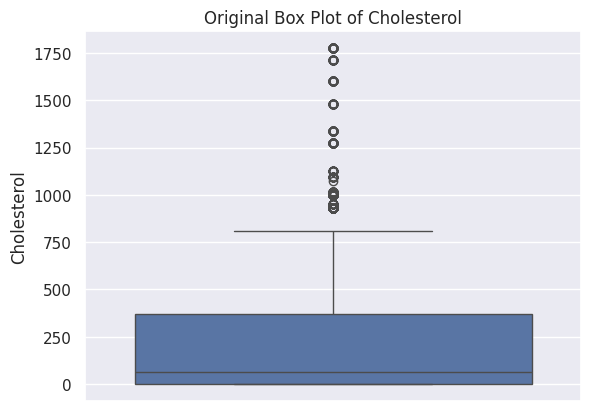

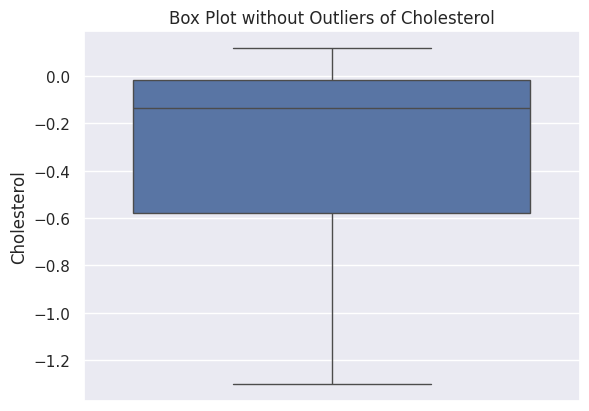

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt


def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(concatenate_df, 'Cholesterol', threshold_value)


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


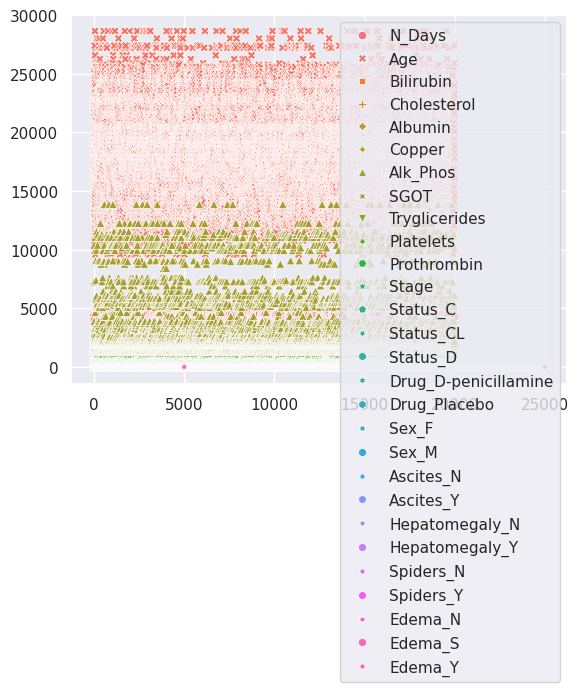

In [204]:
sns.scatterplot(concatenate_df)